Import library

In [2]:
# Imports for model training, validating and testing
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

# Import for model evaluation (graphical depiction)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Imports for personal handwriting testing
import cv2

#for HOG method
from sklearn import datasets
from sklearn import svm
from skimage import feature
from skimage import exposure
from sklearn import metrics
import numpy as np

study about images gradient

image shape:  (1480, 1490, 4)
gray shape: (1480, 1490)


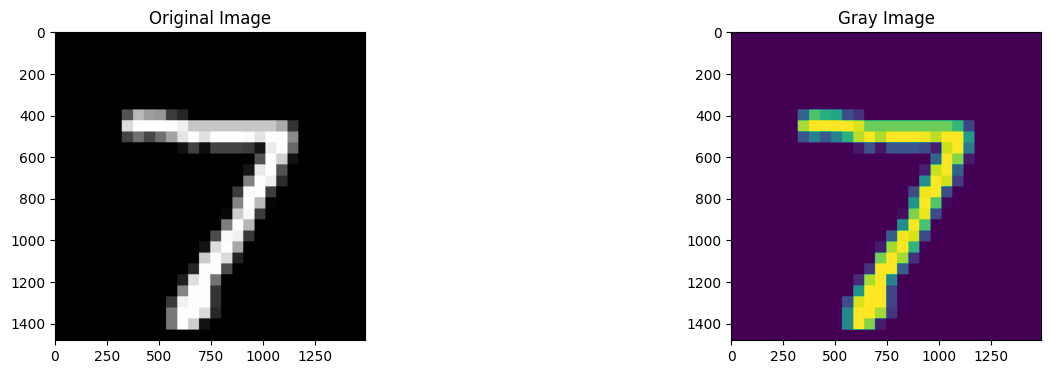

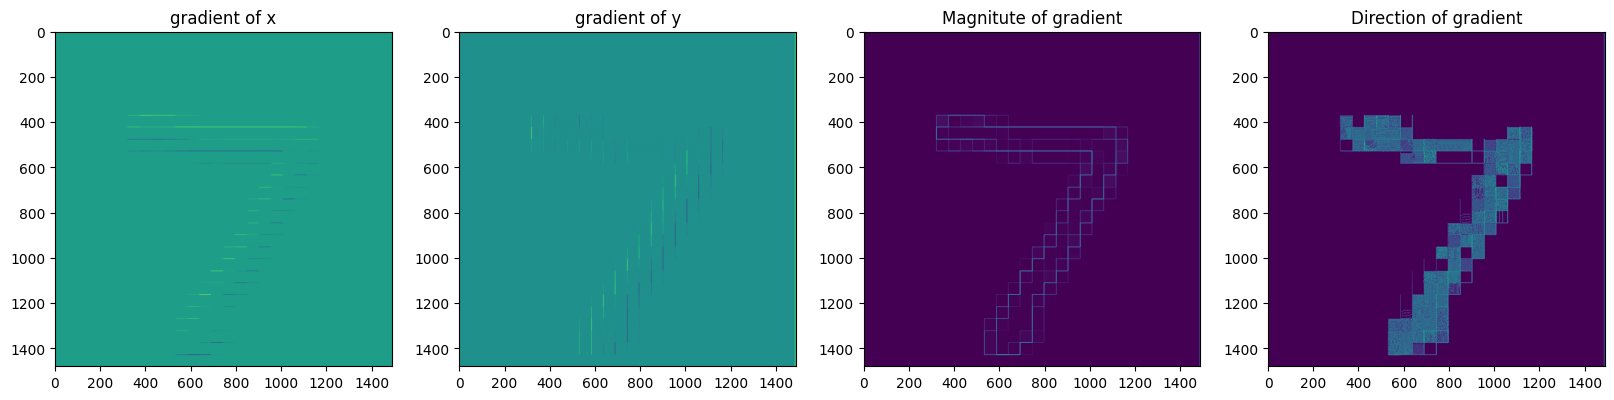

In [7]:
img = plt.imread('sample_image.png', cv2.IMREAD_UNCHANGED)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

print('image shape: ', img.shape)
print('gray shape:', gray.shape)

plt.figure(figsize = (16, 4))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(gray)
plt.title('Gray Image')

gx = cv2.Sobel(gray, cv2.CV_32F, dx=0, dy=1, ksize=3)
gy = cv2.Sobel(gray, cv2.CV_32F, dx=1, dy=0, ksize=3)
g, theta = cv2.cartToPolar(gx, gy, angleInDegrees=True)

w = 20
h = 10

plt.figure(figsize=(w, h))
plt.subplot(1, 4, 1)
plt.title('gradient of x')
plt.imshow(gx)

plt.subplot(1, 4, 2)
plt.title('gradient of y')
plt.imshow(gy)

plt.subplot(1, 4, 3)
plt.title('Magnitute of gradient')
plt.imshow(g)

plt.subplot(1, 4, 4)
plt.title('Direction of gradient')
plt.imshow(theta)

# Using CNN for handwriting detection

In [ ]:
# For real handwriting prediction
!git clone https://github.com/Peachy72/handwritten-digits.git

Cloning into 'handwritten-digits'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 13 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (13/13), 86.35 KiB | 4.54 MiB/s, done.


11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


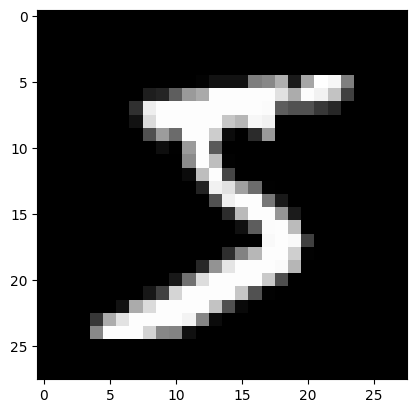

In [8]:
# Step 1: Load the data from keras dataset: mnist
(x, y), _ = keras.datasets.mnist.load_data()

# Check image representation
print(x.shape)
plt.imshow(x[0], cmap='gray')
plt.show()

In [9]:
# Reshape the data to include the channel dimension (1 channel for grayscale images)
x = x.reshape((x.shape[0], 28, 28, 1))
# Normalize the pixel values from 0-255 to 0-1 for better performance of the model.
x = x.astype('float32') / 255

# Step 3: Split the (originally training) data into training (80%) and testing (20%) sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


#Step 4 : build the model . we are using CNN
model = keras.models.Sequential([
    # First convolutional layer: 32 filters, 3x3 kernel size, Activation function: Rectified Linear Unit; input: 2D array (28x28 grayscale image)
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Max pooling layer: 2x2 pool size
    keras.layers.MaxPooling2D((2, 2)),
    # Second convolutional layer: 64 filters, 3x3 kernel size, Activation function: Rectified Linear Unit
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    # Max pooling layer: 2x2 pool size
    keras.layers.MaxPooling2D((2, 2)),
    # Flatten layer to convert 2D data to 1D
    keras.layers.Flatten(),
    # Dense layer: 64 neurons, Activation function: Rectified Linear Unit
    keras.layers.Dense(64, activation='relu'),
    # Output layer: 10 neurons (the 10 digits from 0 - 9); Activation function: Softmax
    keras.layers.Dense(10, activation='softmax')
])

#  Metrics checking: accuracy
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 6: Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=128)

# Step 7: Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/5
375/375 [==============================] - 38s 99ms/step - loss: 0.2845 - accuracy: 0.9133
Epoch 2/5
375/375 [==============================] - 37s 100ms/step - loss: 0.0694 - accuracy: 0.9787
Epoch 3/5
375/375 [==============================] - 36s 97ms/step - loss: 0.0450 - accuracy: 0.9864
Epoch 4/5
375/375 [==============================] - 37s 98ms/step - loss: 0.0339 - accuracy: 0.9894
Epoch 5/5
375/375 [==============================] - 3s 8ms/step - loss: 0.0364 - accuracy: 0.9892
Test accuracy: 0.9891666769981384


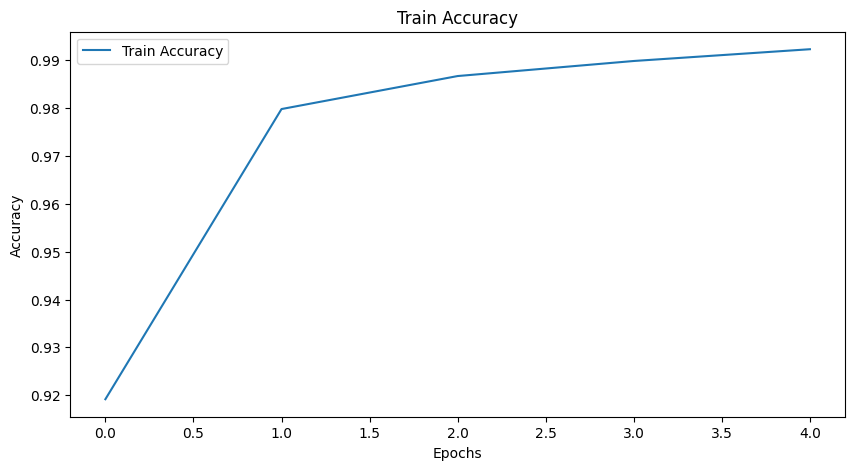

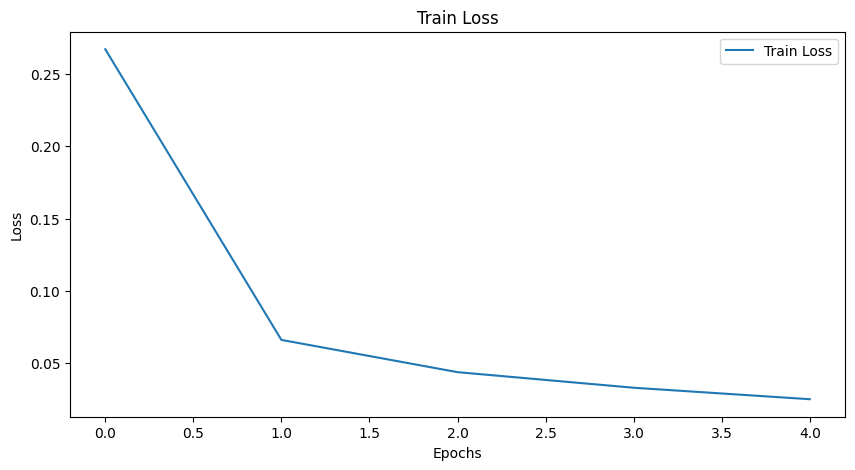

375/375 [==============================] - 7s 19ms/step


Text(0.5, 1.0, 'Class-wise accuracy')

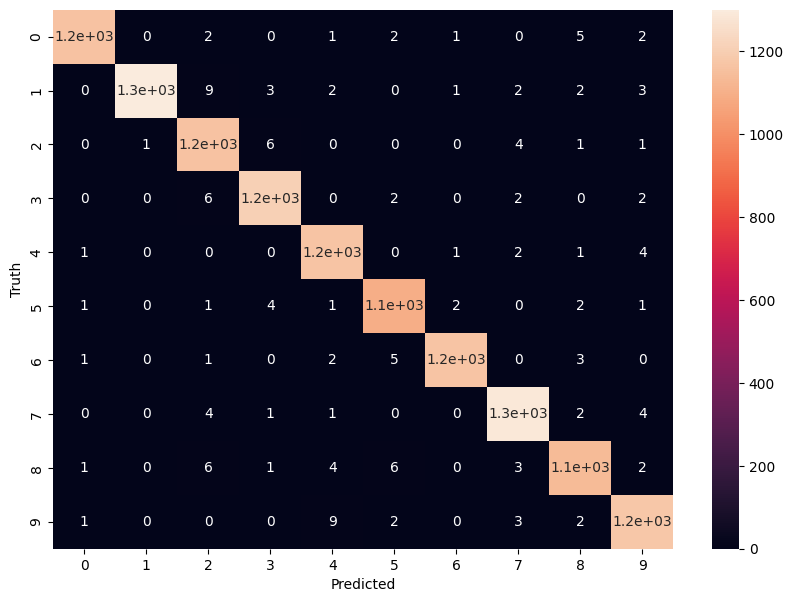

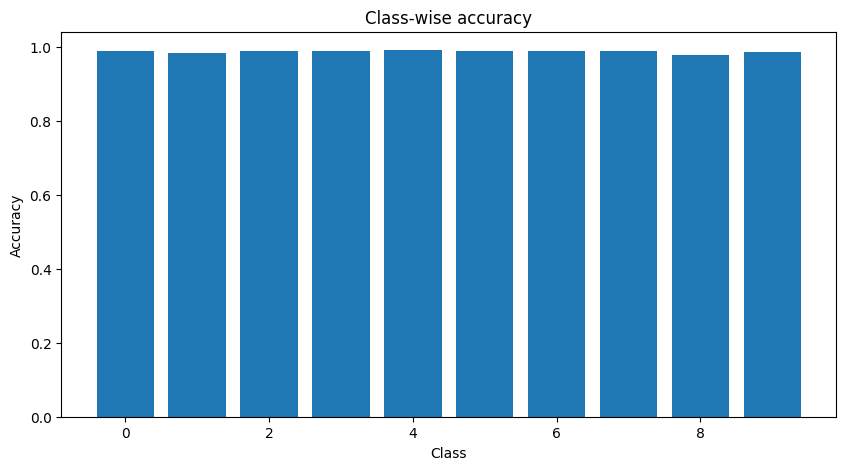

In [ ]:
# Plotting accuracy for training sets per epoch
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.title('Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting loss for training per epoch
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.title('Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predicting the Test set results
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred,axis = 1)

# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Visualizing the Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Calculating class-wise accuracy and plotting it in a bar chart
class_wise_accuracy = np.diag(cm) / np.sum(cm, axis=1)
plt.figure(figsize=(10,5))
plt.bar(range(10), class_wise_accuracy)
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Class-wise accuracy')

# test


test on 1 sample image from MNIST set

In [ ]:
def recognize(path: str) -> str:
    # Use OpenCV to read the image in grayscale
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    # Invert the image
    img = cv2.bitwise_not(img)
    # Resize the image to 28x28 pixels
    img = cv2.resize(img, (28, 28))
    # Normalize the pixel values
    img_array = img / 255.
    # Reshape the image data into a 4D array
    img_array = img_array.reshape(1, 28, 28, 1)
    # Use the model to predict the digit in the image
    prediction = model.predict(img_array)
    return str(np.argmax(prediction))

# Test the model with the image
predicted = recognize('/sample_image.png')
print(f"Predicted: {predicted}")

1/1 [==============================] - 0s 37ms/step
Predicted: 7


test on MNIST test set

375/375 [==============================] - 6s 15ms/step


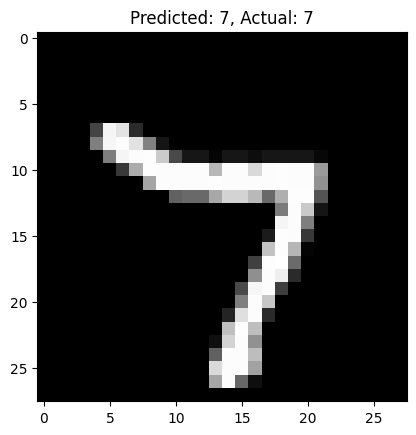

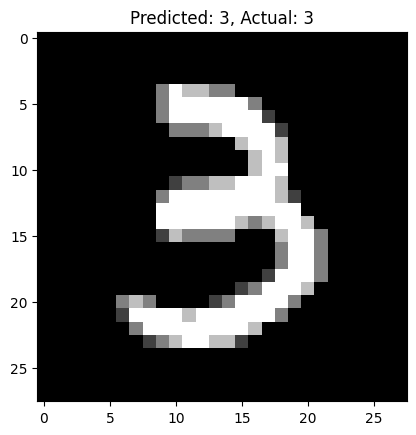

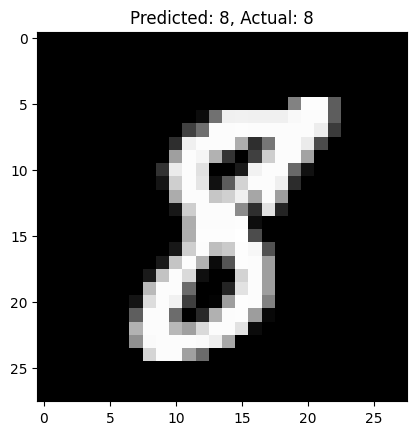

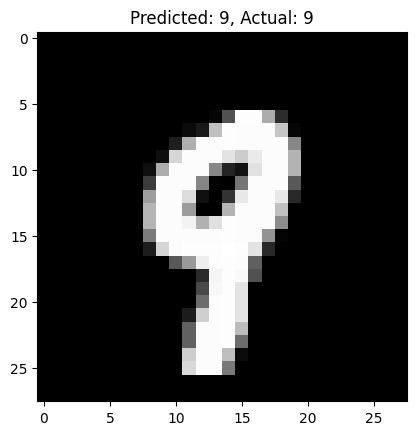

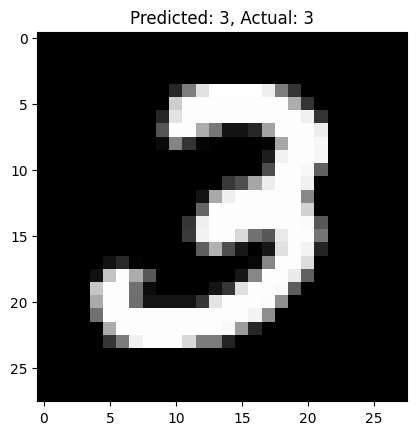

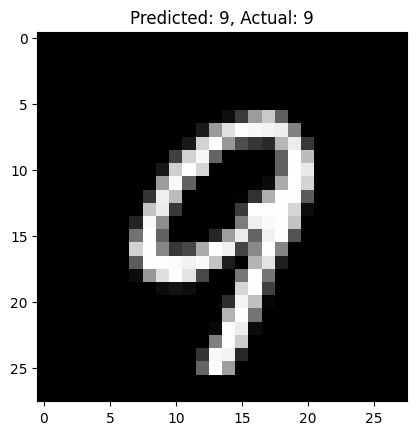

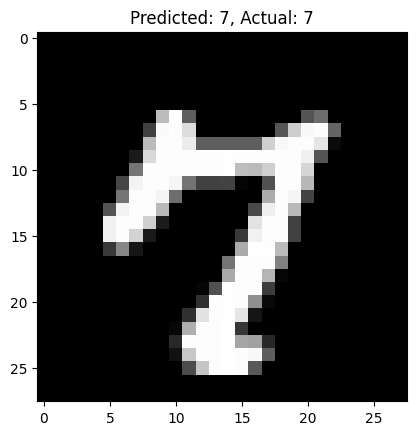

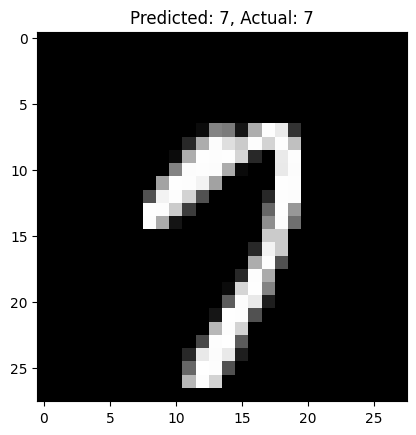

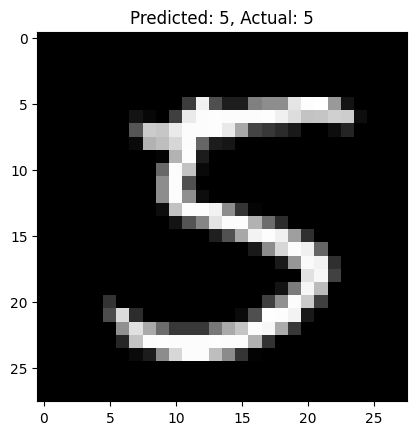

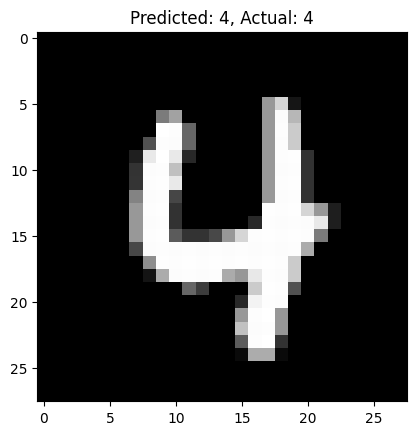

In [ ]:
# Make predictions on the test set
predictions = model.predict(x_test)

# Convert the predictions from probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Display the first 10 images, predicted labels, and actual labels
for i in range(10):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}, Actual: {y_test[i]}")
    plt.show()

Find incorrect prediction of the model

375/375 [==============================] - 7s 19ms/step
Indices of incorrect predictions: [   22    31   231   248   439   485   492   546   614   692   736   810
   923   994  1021  1040  1150  1200  1250  1362  1384  1433  1455  1715
  1756  1924  2043  2053  2060  2122  2250  2291  2298  2546  2558  2610
  2713  2753  3136  3157  3200  3210  3212  3265  3320  3382  3420  3464
  3644  3652  3698  3704  3894  3990  4138  4141  4180  4236  4249  4303
  4334  4407  4442  4496  4506  4667  5026  5154  5236  5309  5427  5693
  5698  6189  6235  6247  6293  6330  6343  6345  6369  6393  6520  6531
  6533  6570  6586  6747  6775  6865  6867  6969  7025  7098  7123  7188
  7334  7351  7366  7579  7827  7933  8014  8024  8255  8333  8700  8877
  8905  9082  9111  9135  9217  9551  9579  9589  9640  9891  9915  9930
  9955  9974  9999 10000 10072 10151 10336 10366 10501 10510 10558 11096
 11106 11157 11162 11168 11291 11318 11428 11548 11635 11763 11765 11816
 11898]


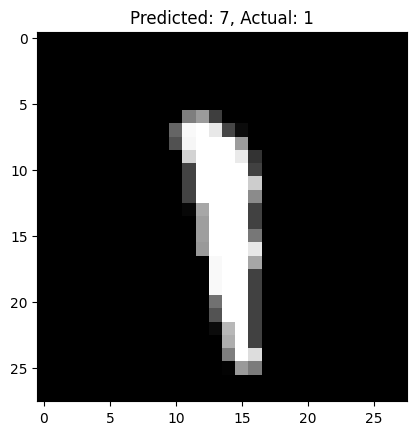

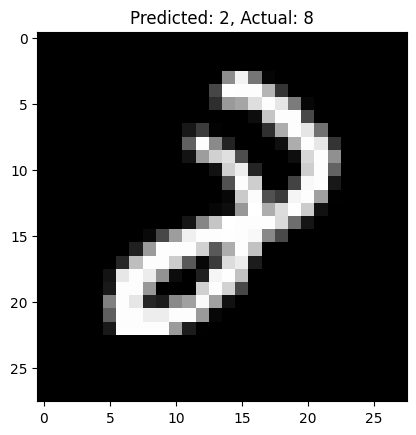

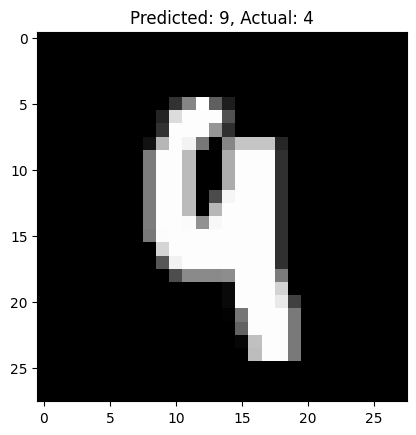

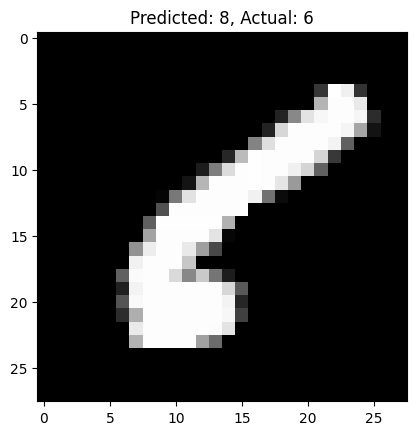

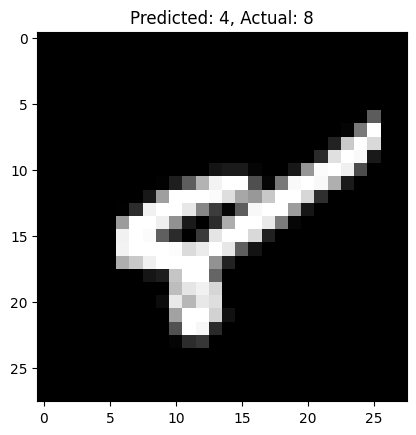

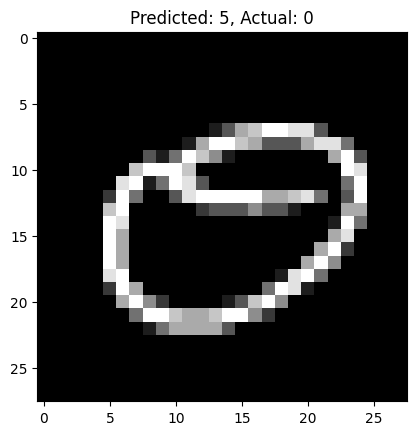

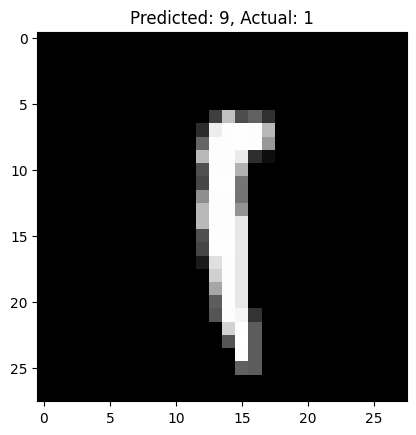

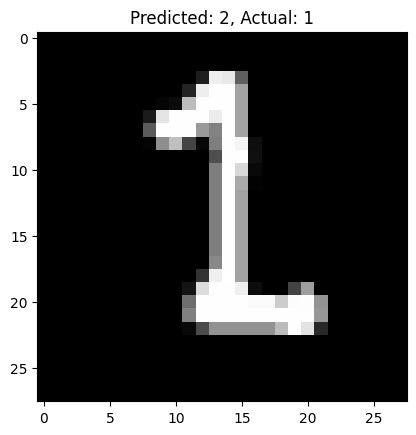

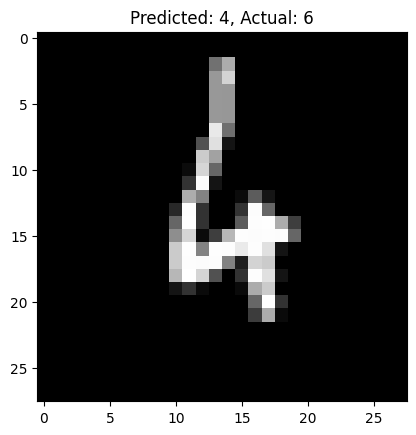

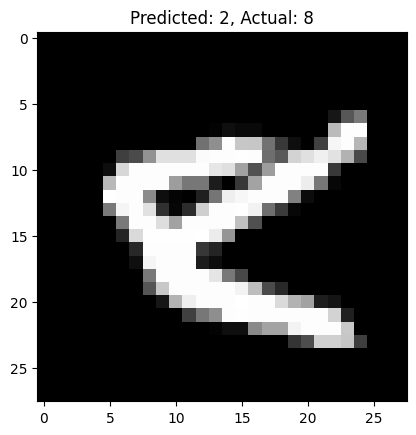

In [ ]:
# Make predictions on the test set
predictions = model.predict(x_test)

# Convert the predictions from probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Find the indices of the incorrect predictions
incorrect_indices = np.nonzero(predicted_labels != y_test)[0]

# Print the indices of the incorrect predictions
print(f"Indices of incorrect predictions: {incorrect_indices}")

# Display the first 10 incorrect images, predicted labels, and actual labels
for i in incorrect_indices[:10]:
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}, Actual: {y_test[i]}")
    plt.show()

# # Display all incorrect images, predicted labels, and actual labels
# for i in incorrect_indices:
#     plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
#     plt.title(f"Predicted: {predicted_labels[i]}, Actual: {y_test[i]}")
#     plt.show()

predict on real handwriting


In [ ]:
for (path, actual) in zip(["one", "two", "three", "four", "five", "six", "seven", "eight", "nine"], range(1, 10)):
    predicted = recognize(f"/content/handwritten-digits/{path}.png")
    print(f"Actual: {actual}, Predicted: {predicted}")

1/1 [==============================] - 0s 24ms/step
Actual: 1, Predicted: 1
1/1 [==============================] - 0s 21ms/step
Actual: 2, Predicted: 2
1/1 [==============================] - 0s 32ms/step
Actual: 3, Predicted: 3
1/1 [==============================] - 0s 22ms/step
Actual: 4, Predicted: 4
1/1 [==============================] - 0s 25ms/step
Actual: 5, Predicted: 3
1/1 [==============================] - 0s 22ms/step
Actual: 6, Predicted: 9
1/1 [==============================] - 0s 23ms/step
Actual: 7, Predicted: 7
1/1 [==============================] - 0s 22ms/step
Actual: 8, Predicted: 3
1/1 [==============================] - 0s 22ms/step
Actual: 9, Predicted: 9


In [ ]:
# Print a summary of the model
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dense_8 (Dense)             (None, 64)               

From the stat:

- First Conv2D layer: The input is 28x28 and the kernel size is 3x3, so the output is 26x26 (because 28-3+1=26). There are 32 filters, so the output has 32 channels. So the output shape is (26, 26, 32).

- First MaxPooling2D layer: The pool size is 2x2, so this layer halves the height and width. The output shape is (13, 13, 32).

- Second Conv2D layer: The input is 13x13 and the kernel size is 3x3, so the output is 11x11 (because 13-3+1=11). There are 64 filters, so the output has 64 channels. So the output shape is (11, 11, 64).

- Second MaxPooling2D layer: The pool size is 2x2, so this layer halves the height and width. The output shape is (5, 5, 64).

- Flatten layer: This layer flattens the 2D data into a 1D vector. The size of the vector is the product of the height, width, and number of channels from the previous layer. So the size is 5564 = 1600.


# Using HOG method to detect hand writing

Extracting features from the training dataset...
Error: Index 75, Predicted: 6, Actual: 1


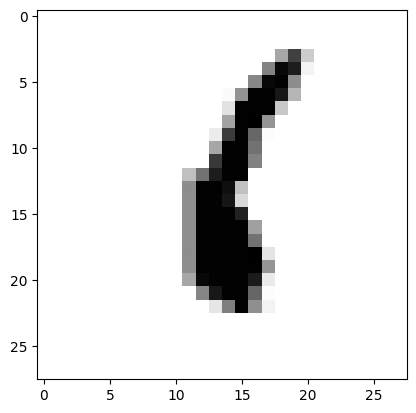

Error: Index 253, Predicted: 2, Actual: 7


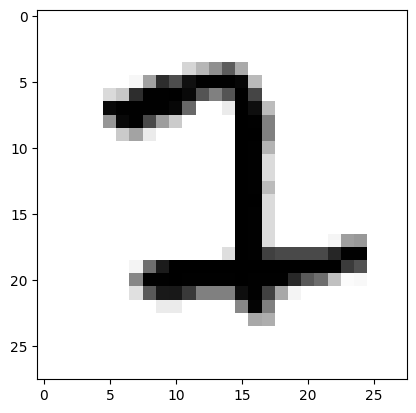

Error: Index 637, Predicted: 1, Actual: 0


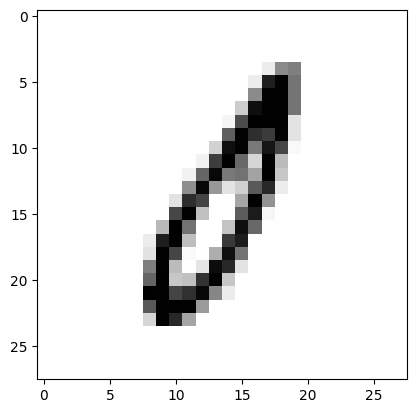

Error: Index 1021, Predicted: 6, Actual: 0


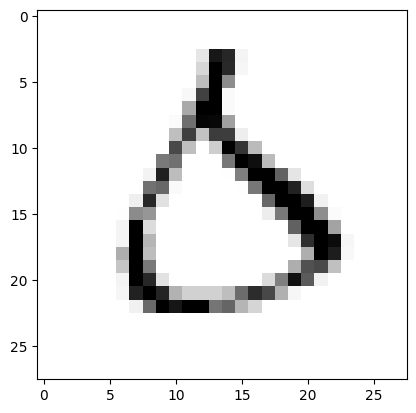

Error: Index 1266, Predicted: 8, Actual: 6


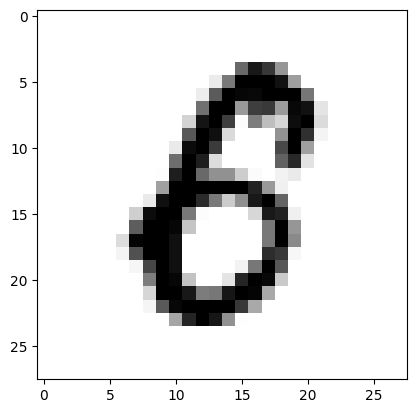

Error: Index 1682, Predicted: 9, Actual: 4


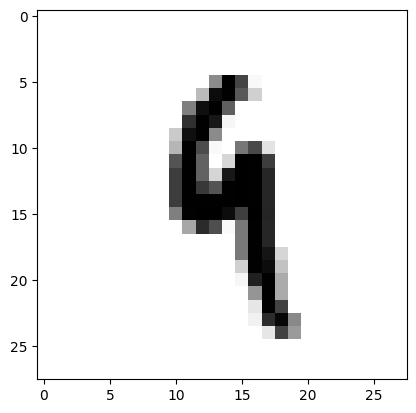

Error: Index 2025, Predicted: 7, Actual: 2


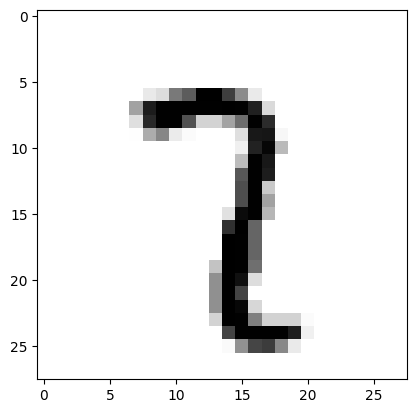

Error: Index 2321, Predicted: 7, Actual: 2


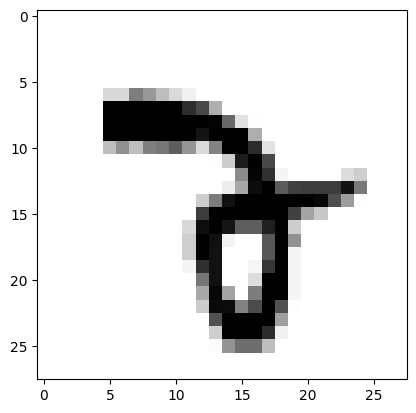

Error: Index 3046, Predicted: 7, Actual: 9


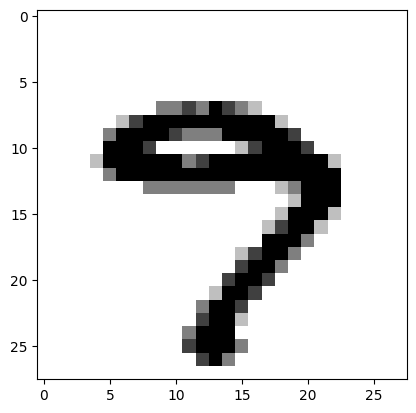

Error: Index 3850, Predicted: 7, Actual: 1


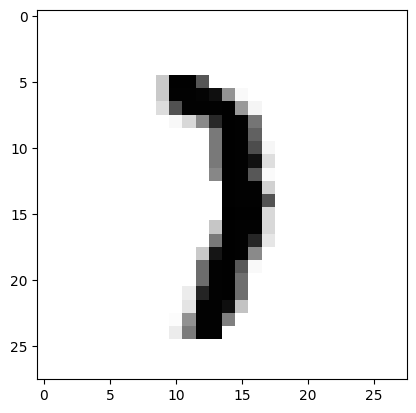

Error: Index 3922, Predicted: 1, Actual: 8


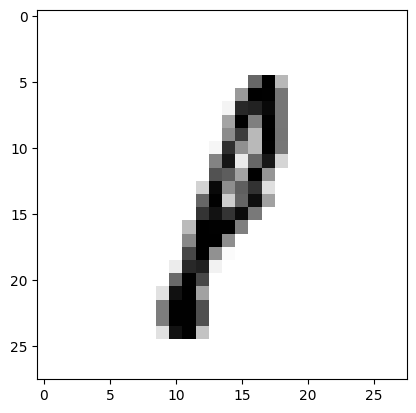

Error: Index 4150, Predicted: 7, Actual: 9


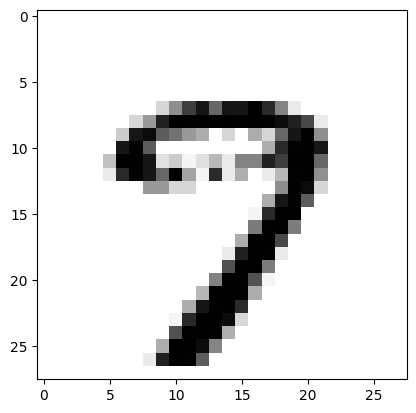

Error: Index 4390, Predicted: 8, Actual: 3


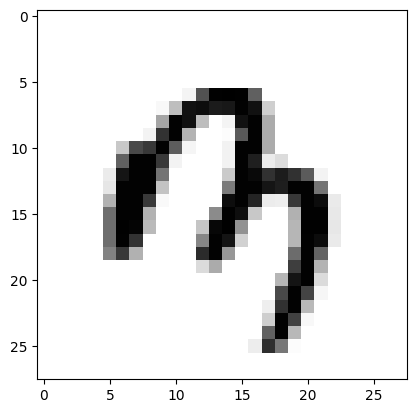

Error: Index 7073, Predicted: 6, Actual: 4


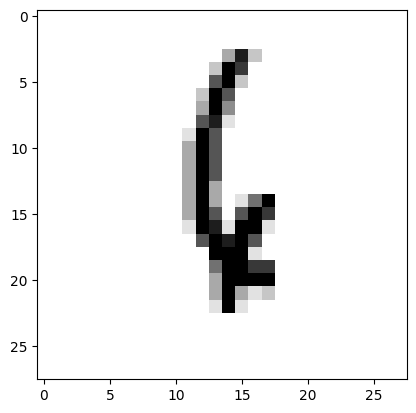

Error: Index 7293, Predicted: 9, Actual: 4


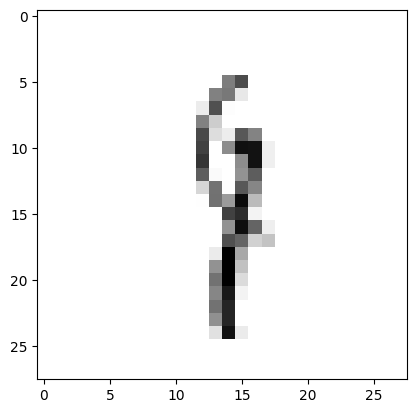

Error: Index 7417, Predicted: 9, Actual: 2


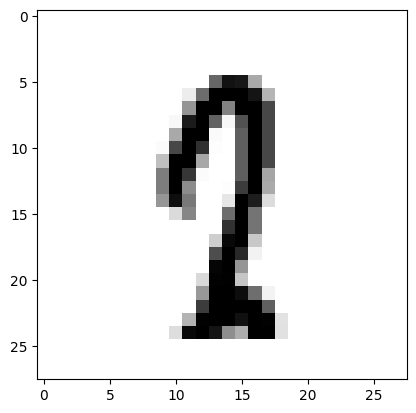

Error: Index 7664, Predicted: 1, Actual: 8


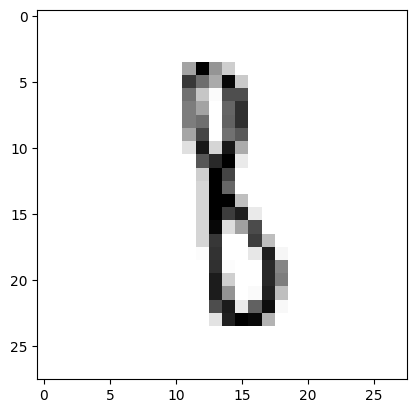

Error: Index 7928, Predicted: 0, Actual: 6


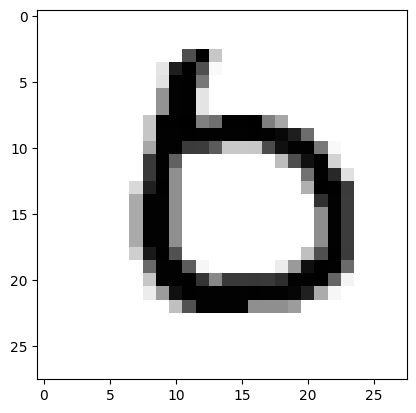

Error: Index 8415, Predicted: 7, Actual: 3


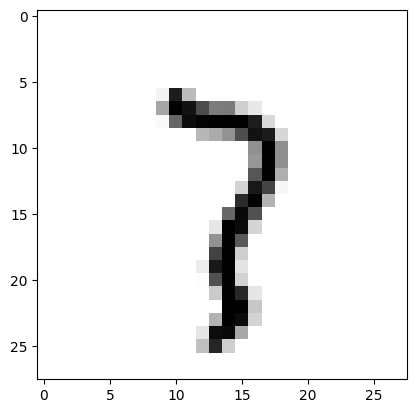

Error: Index 8485, Predicted: 9, Actual: 3


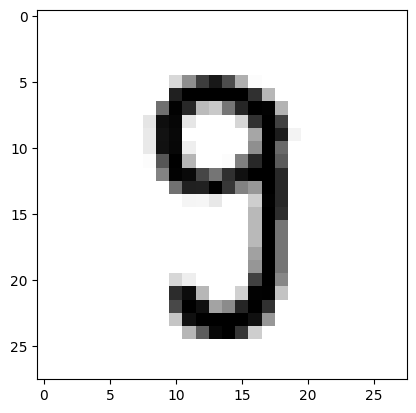

Error: Index 8788, Predicted: 3, Actual: 9


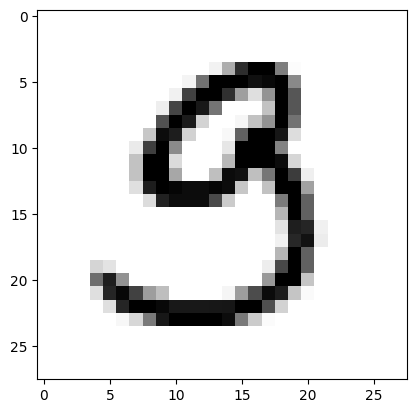

Error: Index 8824, Predicted: 9, Actual: 7


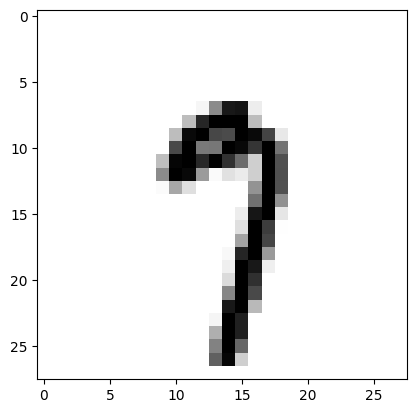

Error: Index 8856, Predicted: 1, Actual: 0


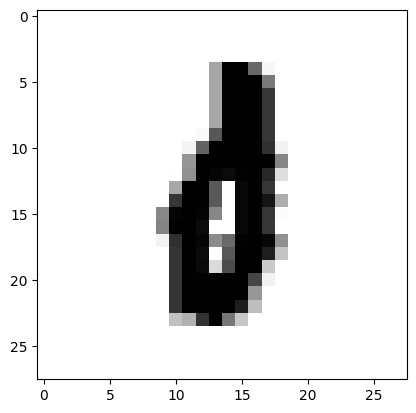

Error: Index 9499, Predicted: 9, Actual: 4


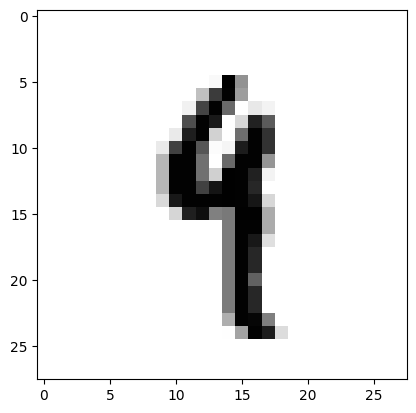

Error: Index 9620, Predicted: 8, Actual: 2


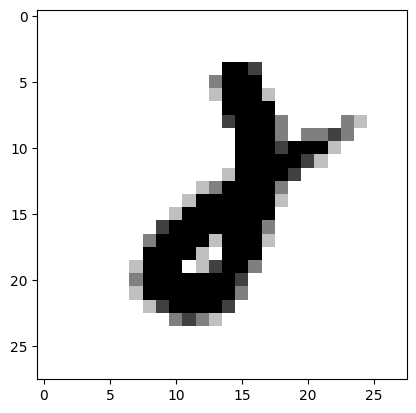

Error: Index 11433, Predicted: 4, Actual: 6


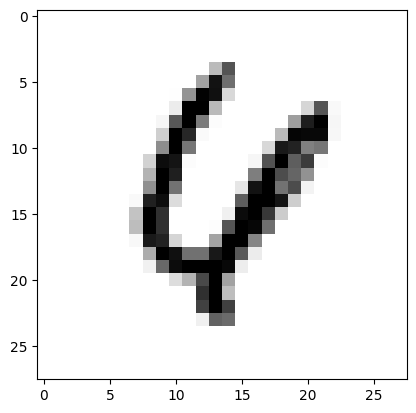

Error: Index 11759, Predicted: 7, Actual: 3


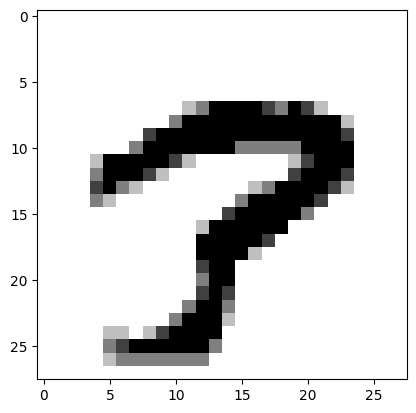

Error: Index 11798, Predicted: 5, Actual: 9


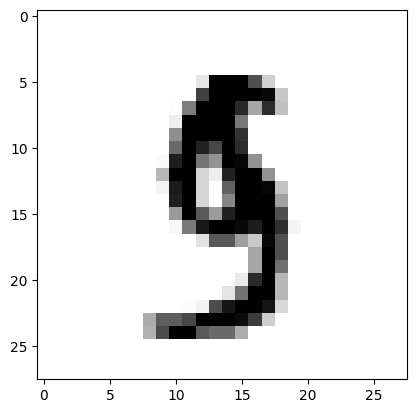

Error: Index 12130, Predicted: 6, Actual: 5


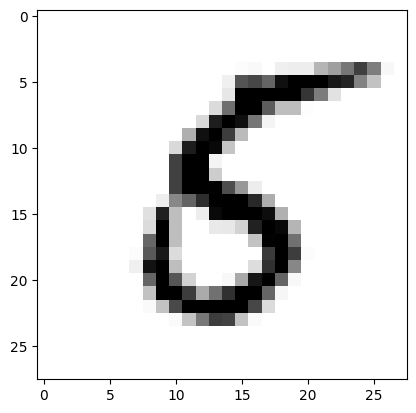

Error: Index 12148, Predicted: 6, Actual: 5


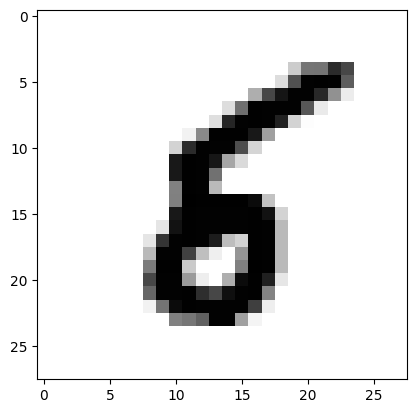

Error: Index 12414, Predicted: 9, Actual: 7


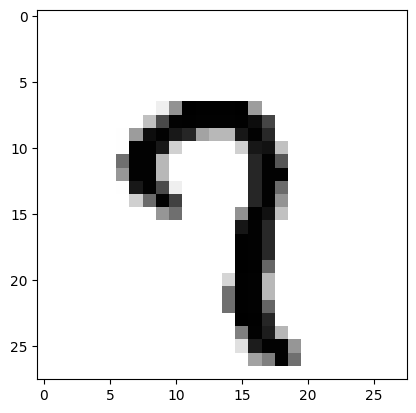

Error: Index 13037, Predicted: 2, Actual: 7


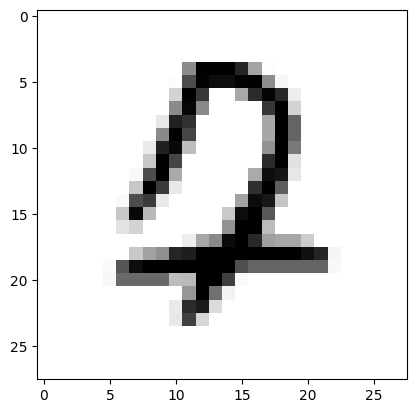

Error: Index 13422, Predicted: 6, Actual: 5


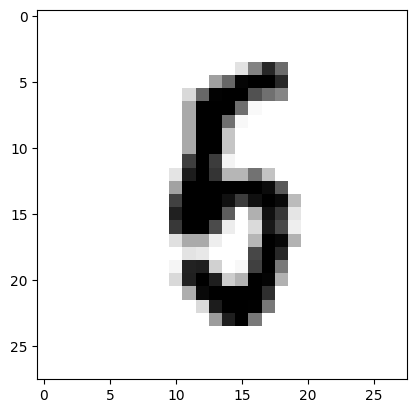

Error: Index 13979, Predicted: 1, Actual: 7


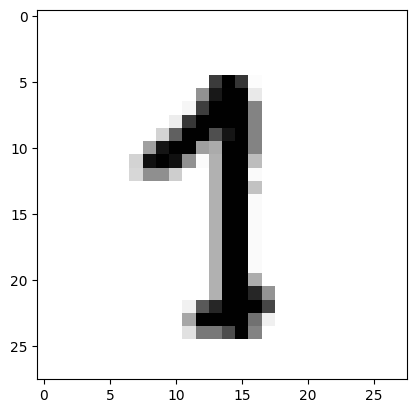

Error: Index 14877, Predicted: 1, Actual: 9


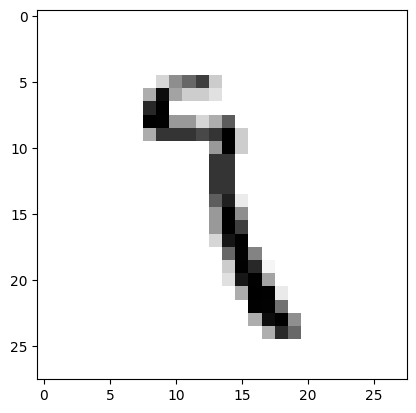

Error: Index 15104, Predicted: 3, Actual: 5


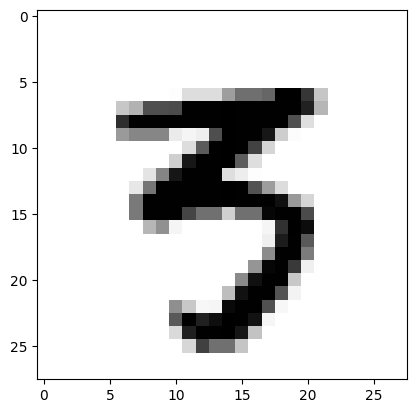

Error: Index 15364, Predicted: 4, Actual: 9


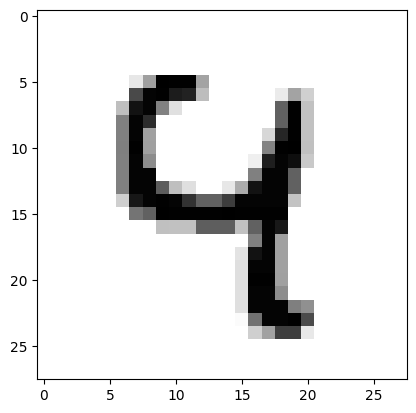

Error: Index 15578, Predicted: 6, Actual: 8


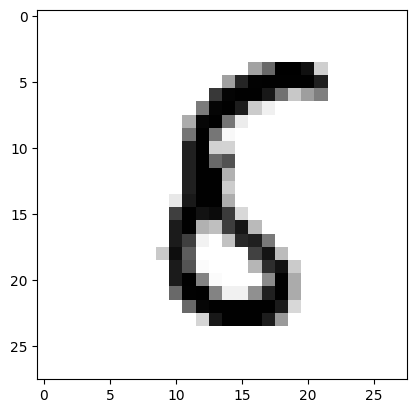

Error: Index 15865, Predicted: 9, Actual: 4


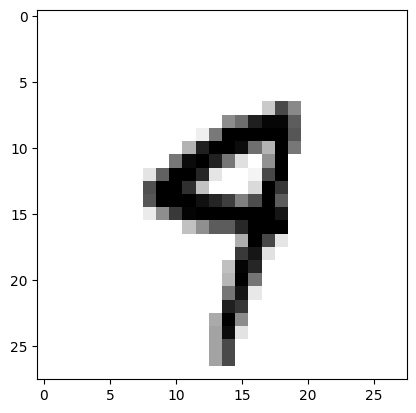

Error: Index 15920, Predicted: 6, Actual: 4


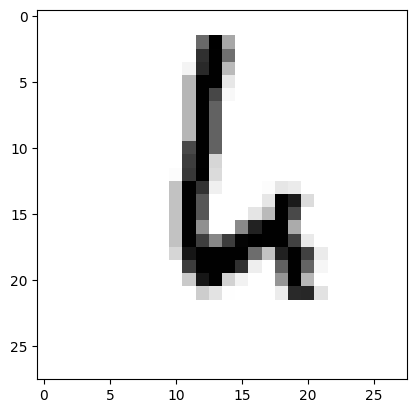

Error: Index 16109, Predicted: 8, Actual: 3


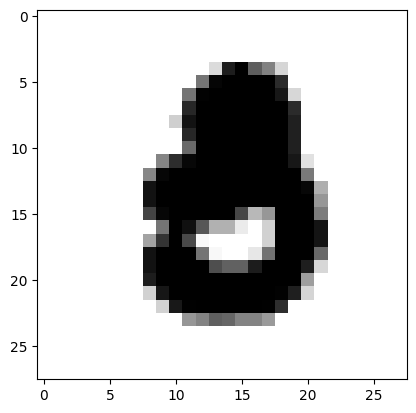

Error: Index 16851, Predicted: 9, Actual: 2


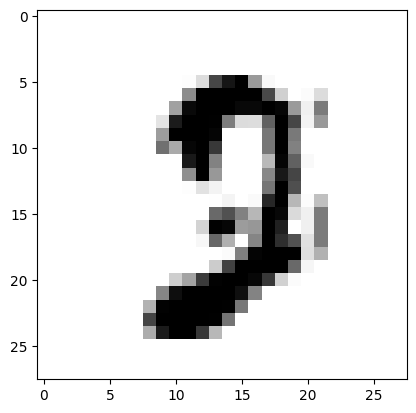

Error: Index 16865, Predicted: 7, Actual: 9


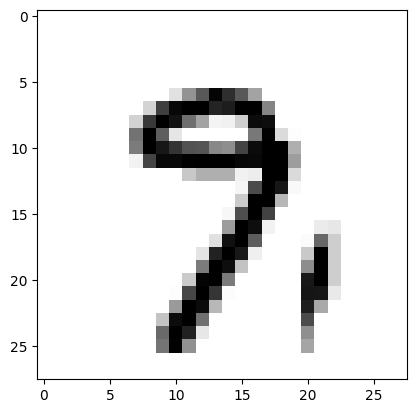

Error: Index 17061, Predicted: 7, Actual: 4


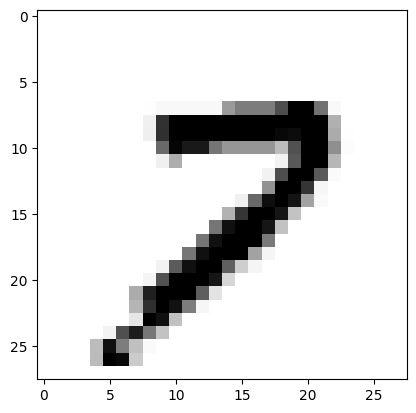

Error: Index 17254, Predicted: 9, Actual: 7


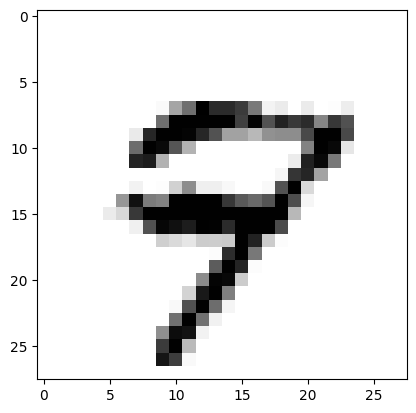

Error: Index 17444, Predicted: 4, Actual: 9


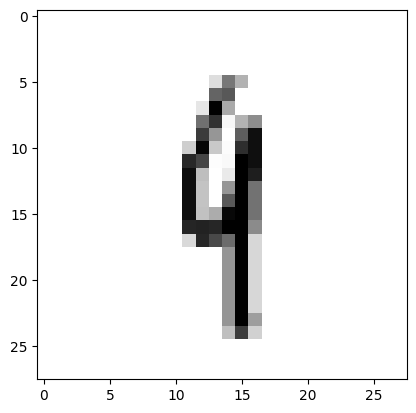

Error: Index 17721, Predicted: 4, Actual: 9


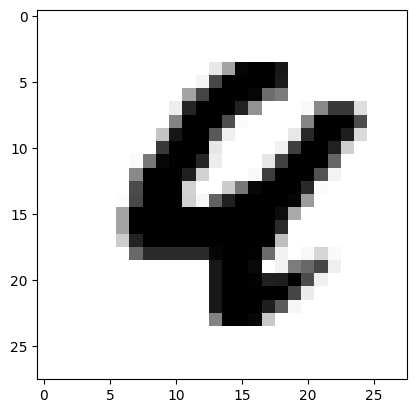

Error: Index 17999, Predicted: 2, Actual: 6


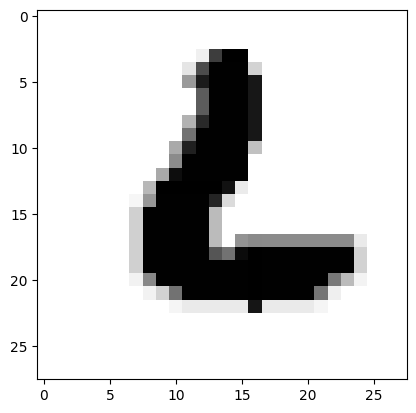

Error: Index 18694, Predicted: 9, Actual: 7


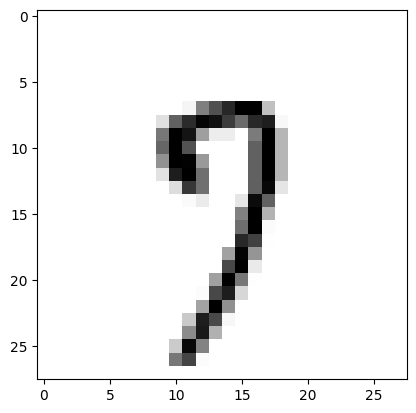

Error: Index 18954, Predicted: 7, Actual: 2


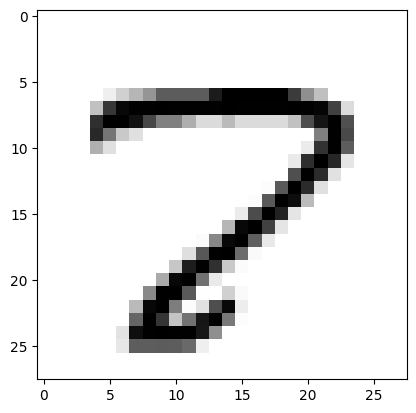

Error: Index 19612, Predicted: 7, Actual: 9


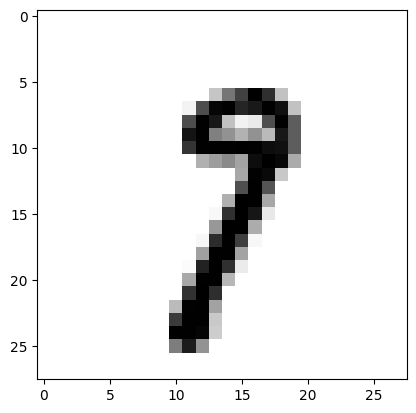

Error: Index 20367, Predicted: 8, Actual: 9


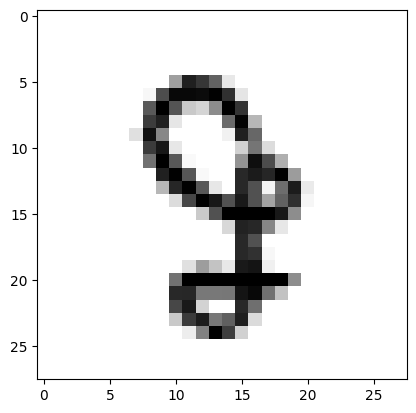

Error: Index 20557, Predicted: 2, Actual: 7


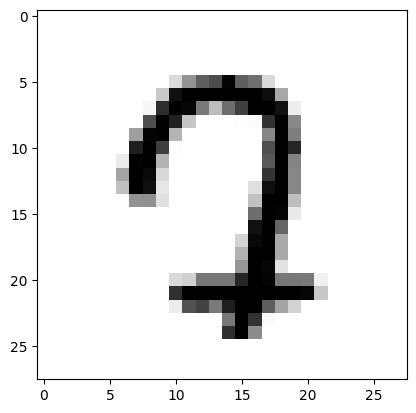

Error: Index 21258, Predicted: 9, Actual: 8


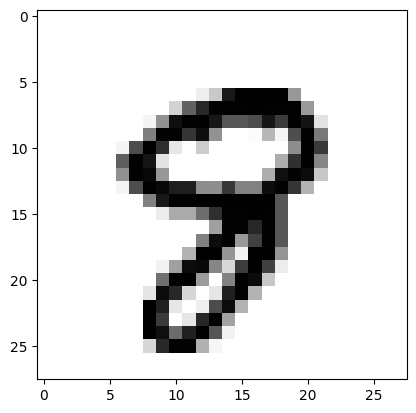

Error: Index 22047, Predicted: 8, Actual: 3


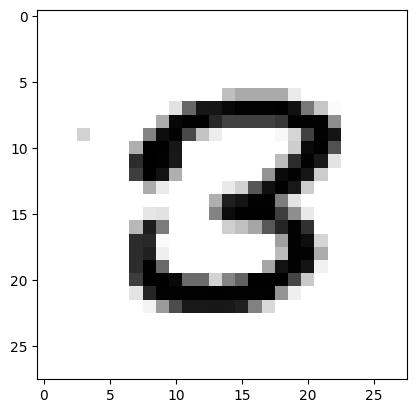

Error: Index 22723, Predicted: 7, Actual: 3


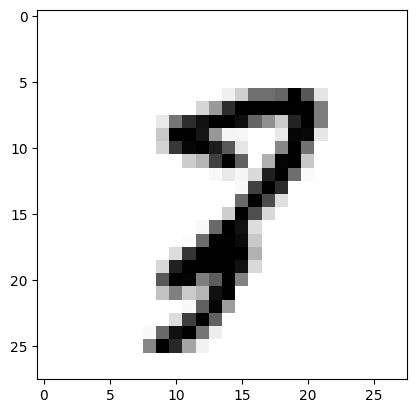

Error: Index 22945, Predicted: 3, Actual: 5


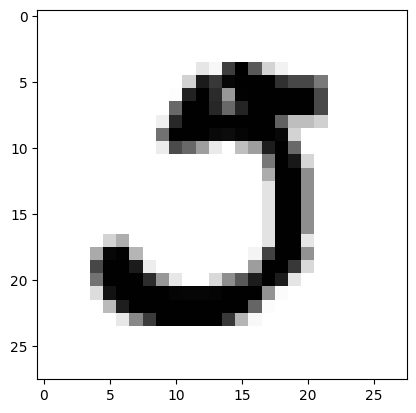

Error: Index 23253, Predicted: 8, Actual: 4


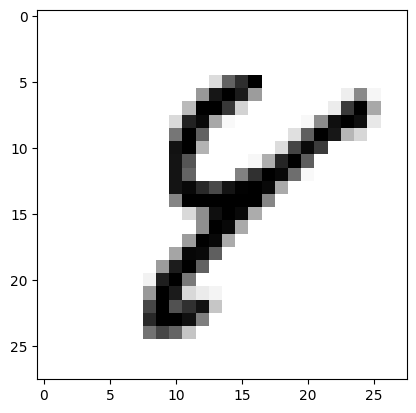

Error: Index 23733, Predicted: 7, Actual: 9


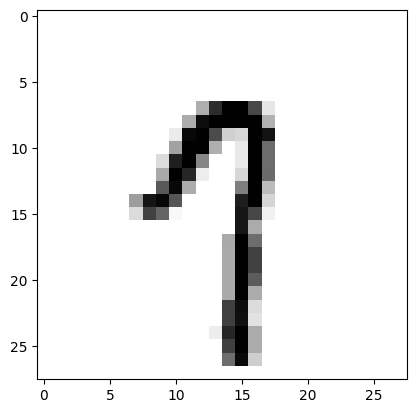

Error: Index 23986, Predicted: 9, Actual: 4


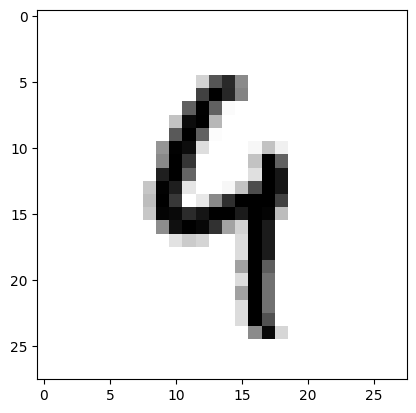

Error: Index 24116, Predicted: 9, Actual: 8


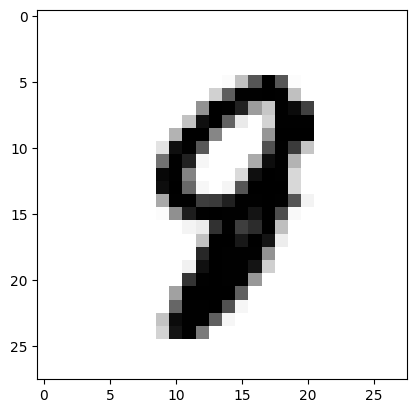

Error: Index 24365, Predicted: 7, Actual: 9


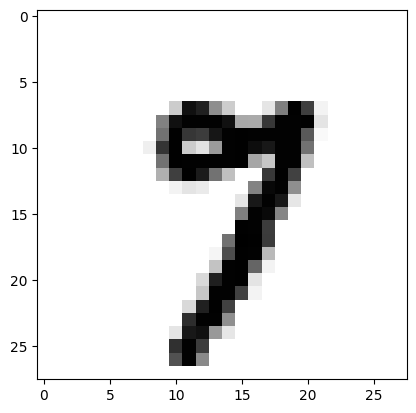

Error: Index 24481, Predicted: 3, Actual: 5


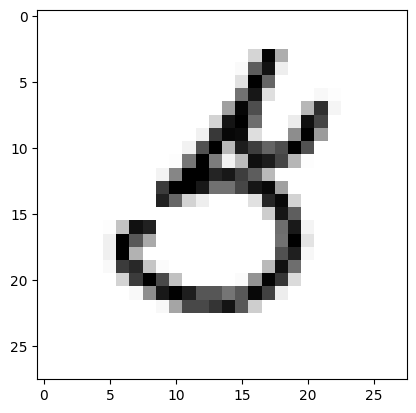

Error: Index 24638, Predicted: 1, Actual: 2


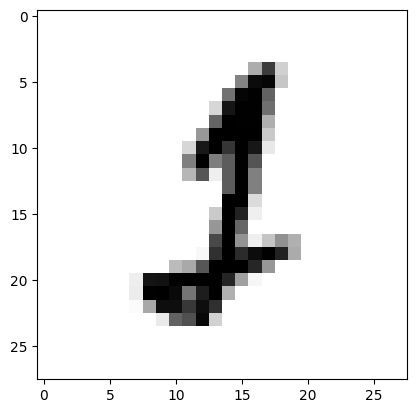

Error: Index 24752, Predicted: 0, Actual: 8


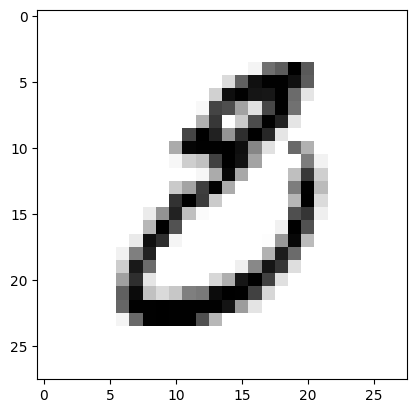

Error: Index 25114, Predicted: 9, Actual: 4


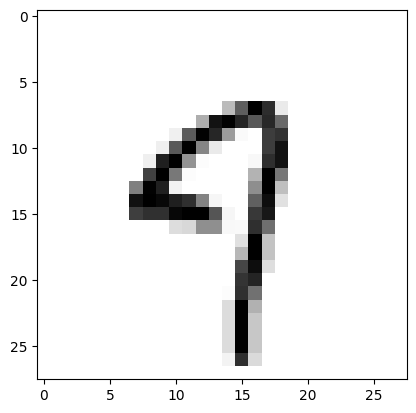

Error: Index 25333, Predicted: 4, Actual: 9


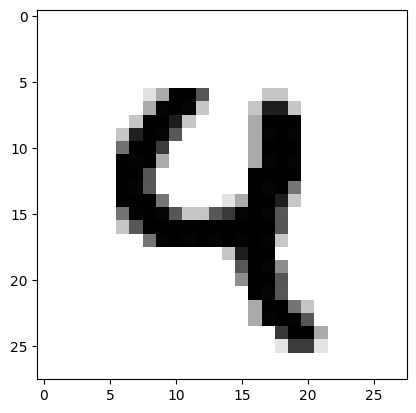

Error: Index 26804, Predicted: 7, Actual: 2


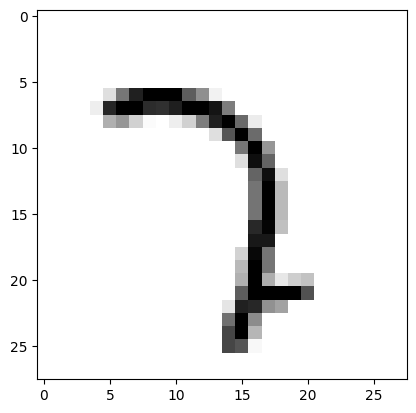

Error: Index 27323, Predicted: 1, Actual: 5


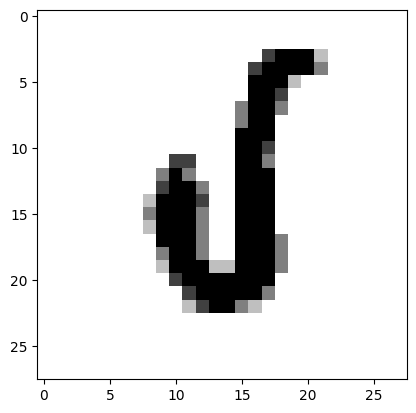

Error: Index 27445, Predicted: 6, Actual: 4


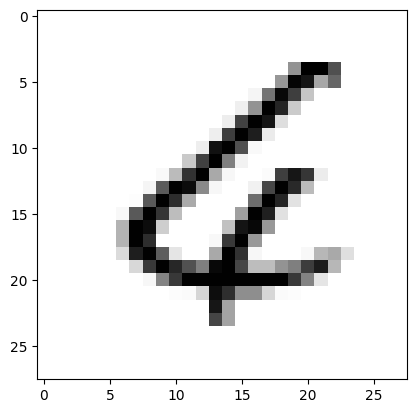

Error: Index 27484, Predicted: 8, Actual: 3


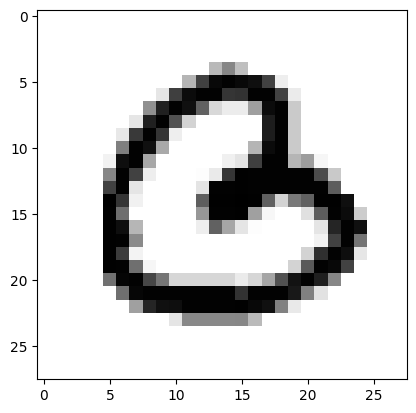

Error: Index 27691, Predicted: 2, Actual: 1


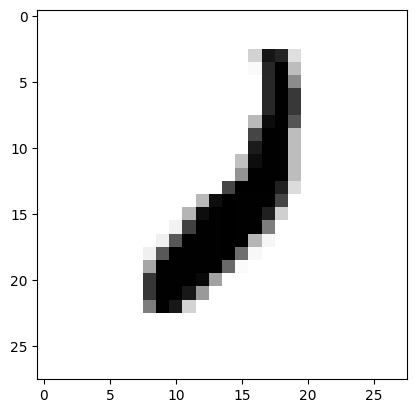

Error: Index 27891, Predicted: 7, Actual: 1


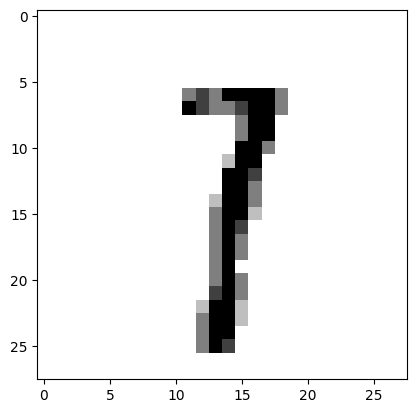

Error: Index 27996, Predicted: 6, Actual: 0


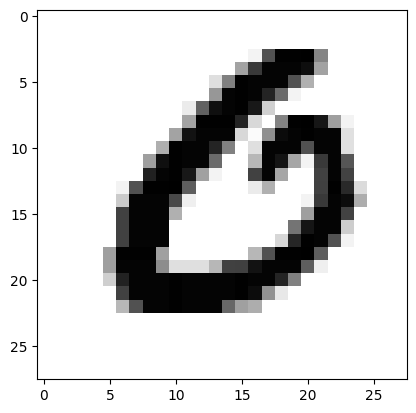

Error: Index 28562, Predicted: 8, Actual: 3


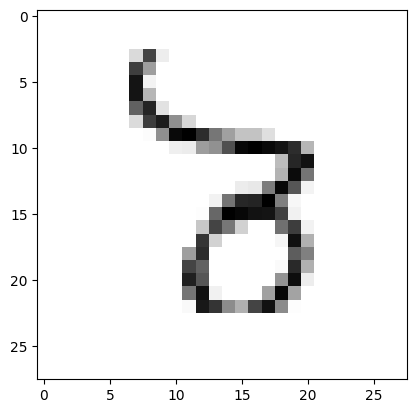

Error: Index 28780, Predicted: 7, Actual: 1


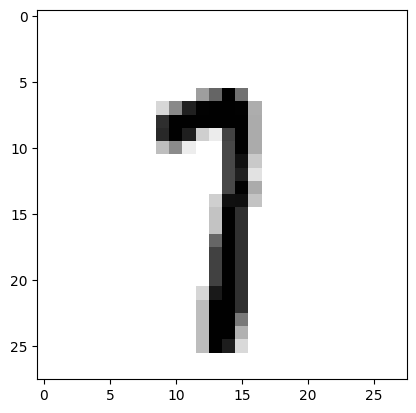

Error: Index 28797, Predicted: 1, Actual: 7


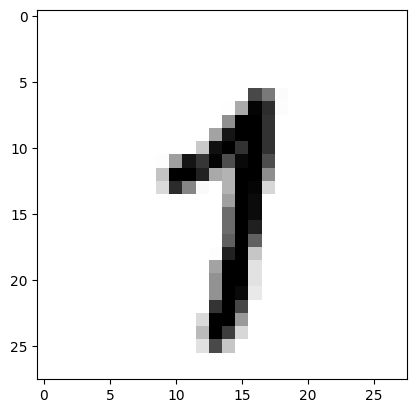

Error: Index 29284, Predicted: 8, Actual: 2


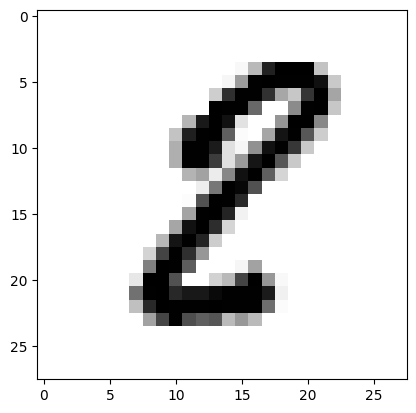

Error: Index 29320, Predicted: 7, Actual: 2


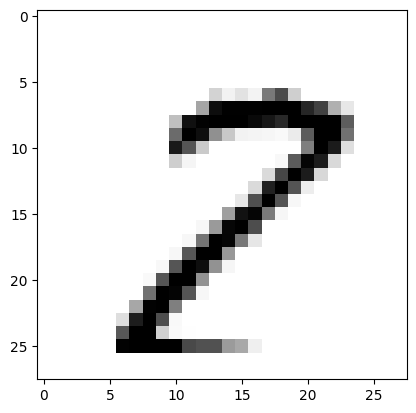

Error: Index 29373, Predicted: 9, Actual: 4


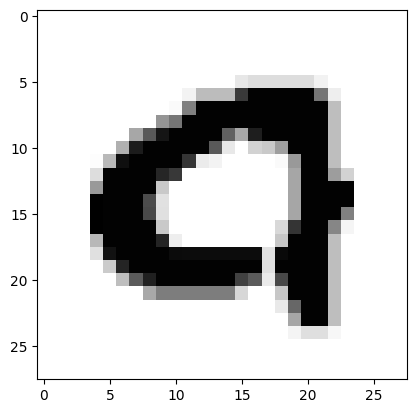

Error: Index 29577, Predicted: 2, Actual: 3


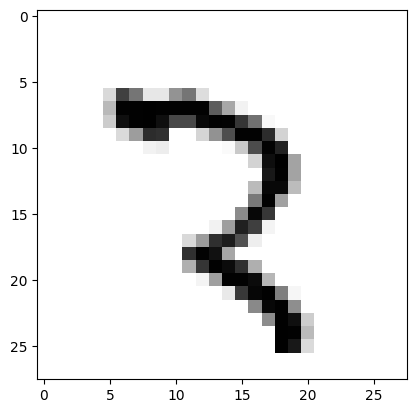

Error: Index 30452, Predicted: 9, Actual: 8


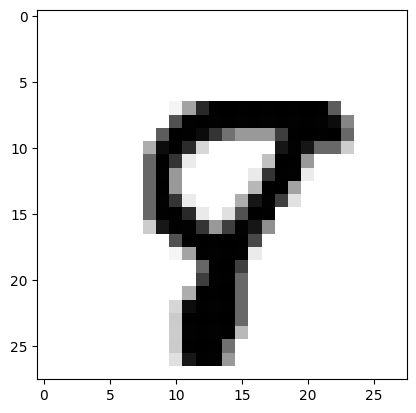

Error: Index 30544, Predicted: 7, Actual: 2


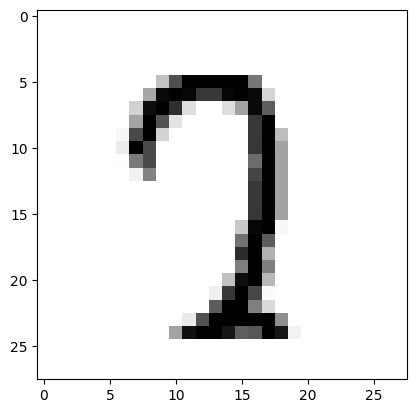

Error: Index 30911, Predicted: 1, Actual: 9


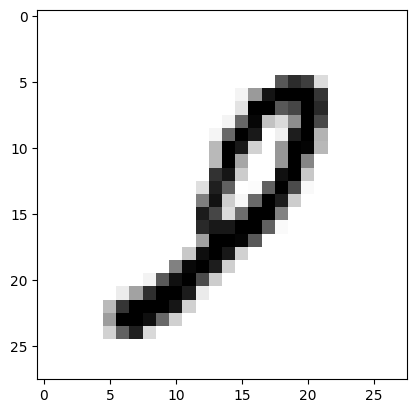

Error: Index 30960, Predicted: 7, Actual: 9


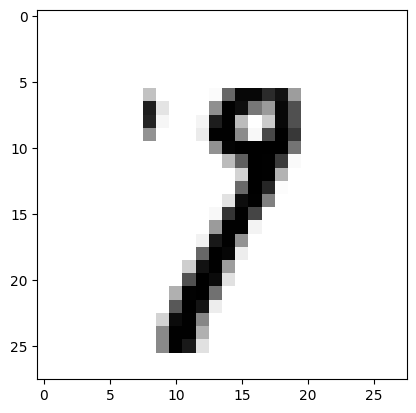

Error: Index 30969, Predicted: 6, Actual: 5


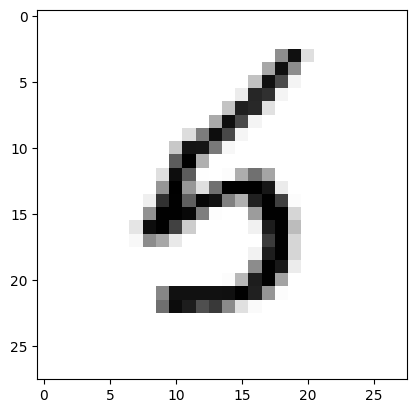

Error: Index 31035, Predicted: 9, Actual: 4


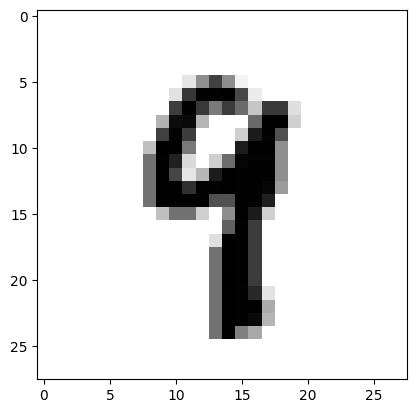

Error: Index 31163, Predicted: 7, Actual: 1


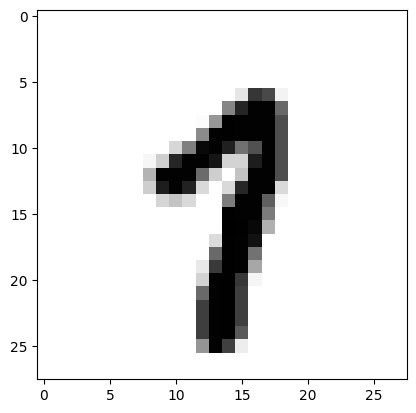

Error: Index 31303, Predicted: 8, Actual: 9


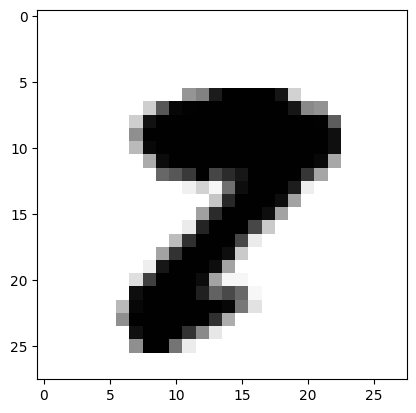

Error: Index 31320, Predicted: 8, Actual: 9


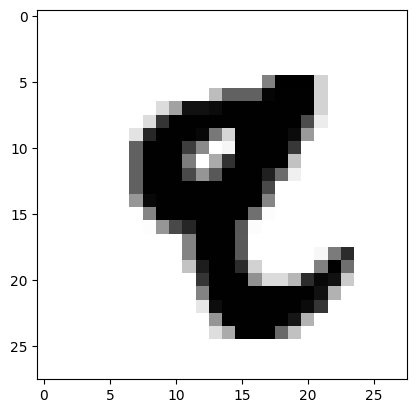

Error: Index 31448, Predicted: 7, Actual: 9


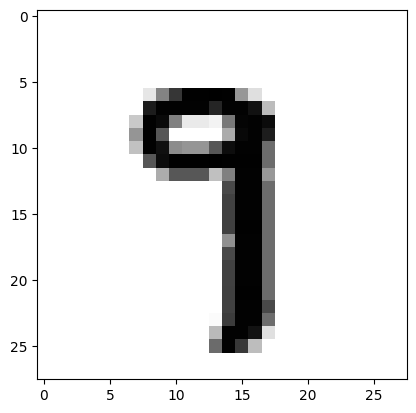

Error: Index 31680, Predicted: 6, Actual: 5


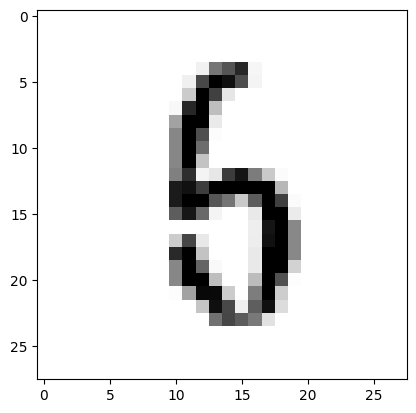

Error: Index 32242, Predicted: 1, Actual: 8


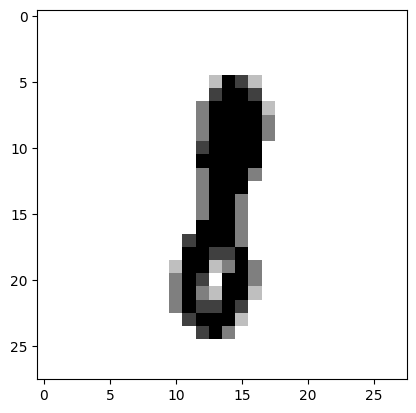

Error: Index 32246, Predicted: 6, Actual: 8


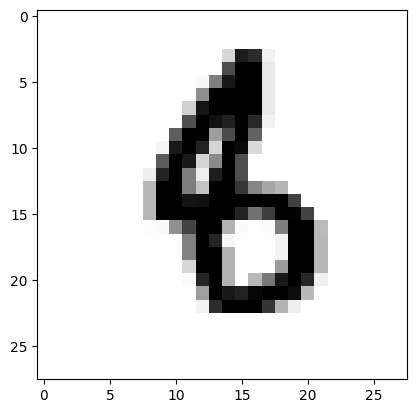

Error: Index 32350, Predicted: 1, Actual: 6


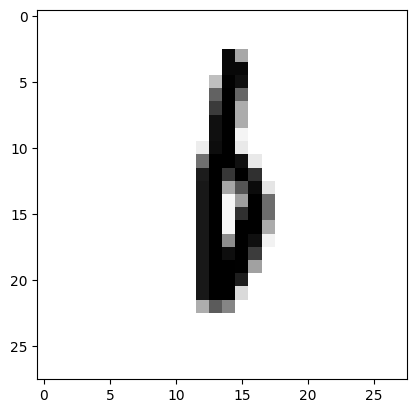

Error: Index 32603, Predicted: 0, Actual: 6


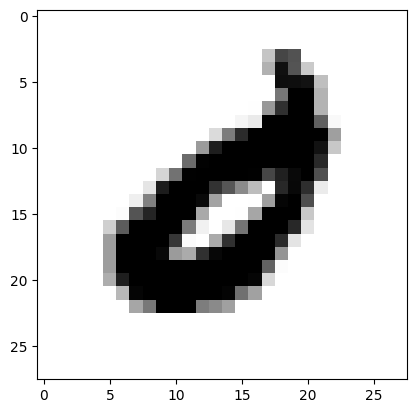

Error: Index 32934, Predicted: 1, Actual: 7


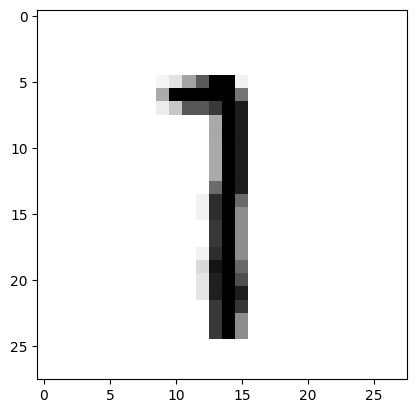

Error: Index 34883, Predicted: 1, Actual: 4


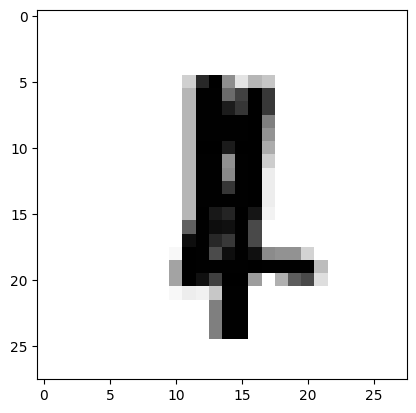

Error: Index 35866, Predicted: 8, Actual: 9


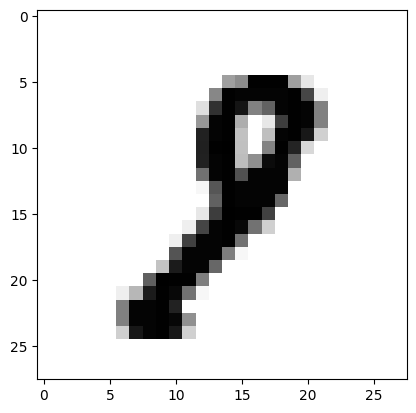

Error: Index 36039, Predicted: 0, Actual: 2


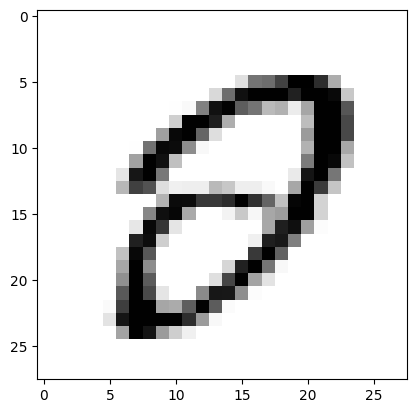

Error: Index 36519, Predicted: 1, Actual: 8


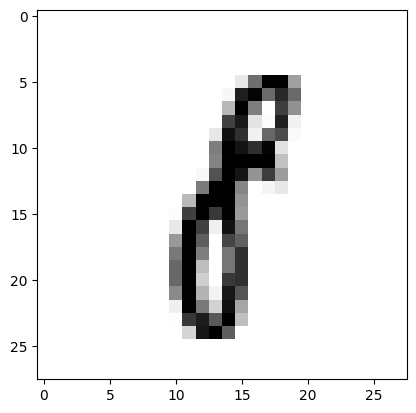

Error: Index 36724, Predicted: 8, Actual: 6


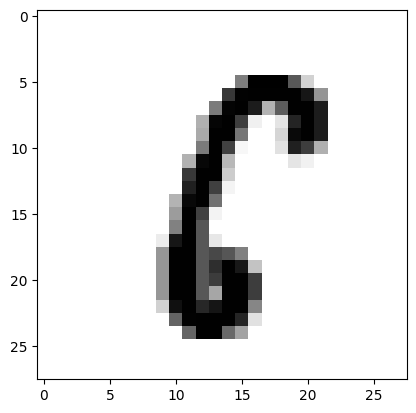

Error: Index 38263, Predicted: 2, Actual: 8


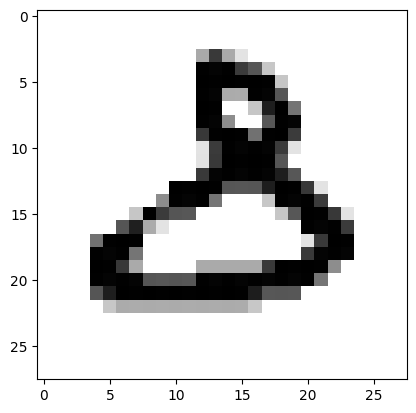

Error: Index 38653, Predicted: 3, Actual: 5


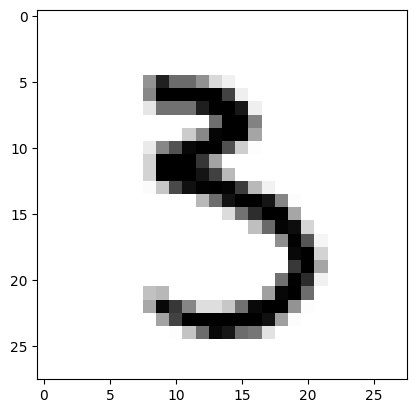

Error: Index 38926, Predicted: 7, Actual: 1


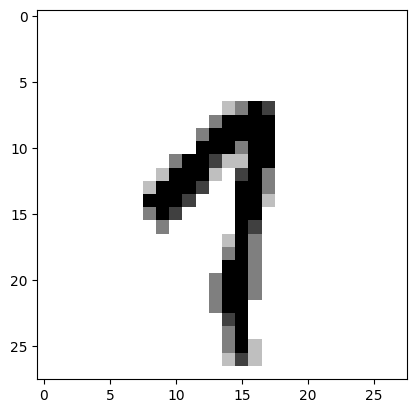

Error: Index 39375, Predicted: 9, Actual: 7


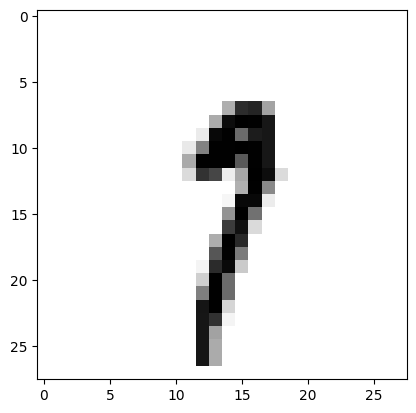

Error: Index 39635, Predicted: 6, Actual: 5


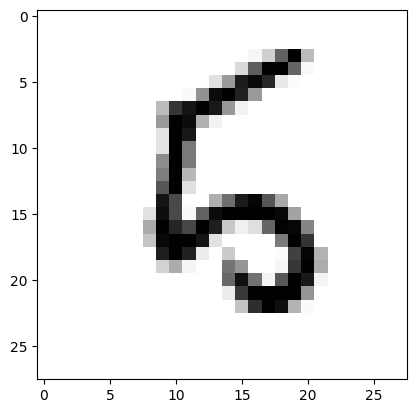

Error: Index 39715, Predicted: 3, Actual: 5


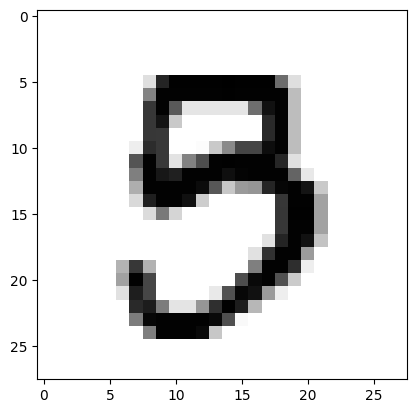

Error: Index 39920, Predicted: 9, Actual: 5


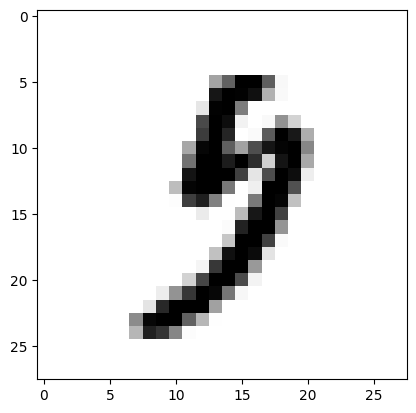

Error: Index 40461, Predicted: 2, Actual: 1


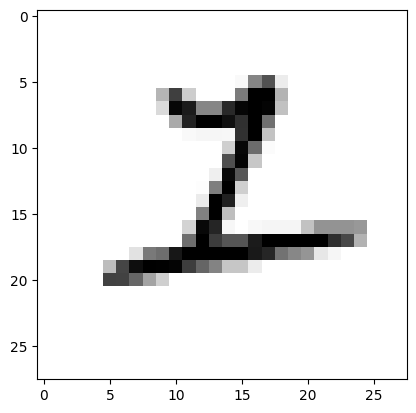

Error: Index 41052, Predicted: 9, Actual: 4


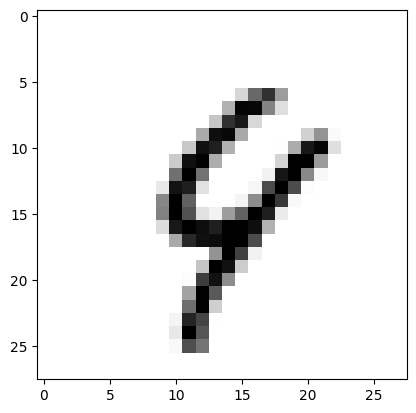

Error: Index 41226, Predicted: 9, Actual: 7


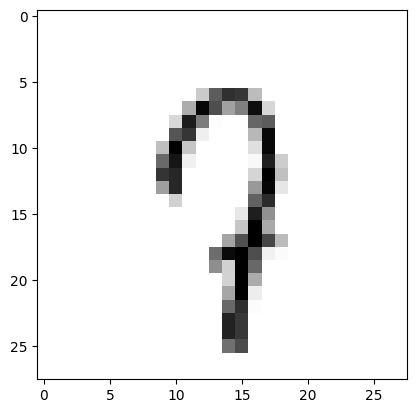

Error: Index 41638, Predicted: 1, Actual: 2


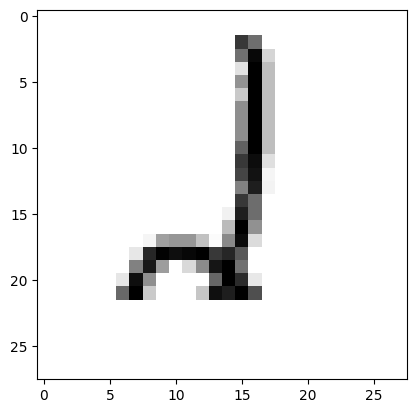

Error: Index 41689, Predicted: 1, Actual: 3


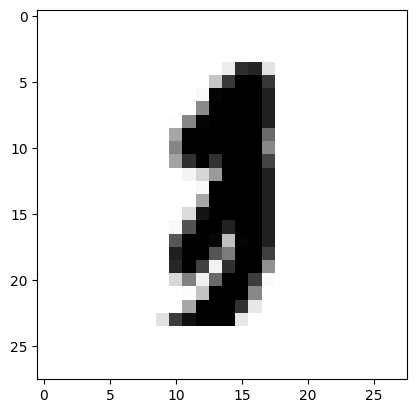

Error: Index 41756, Predicted: 8, Actual: 9


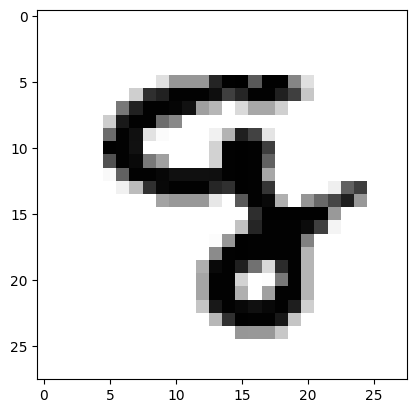

Error: Index 42586, Predicted: 7, Actual: 1


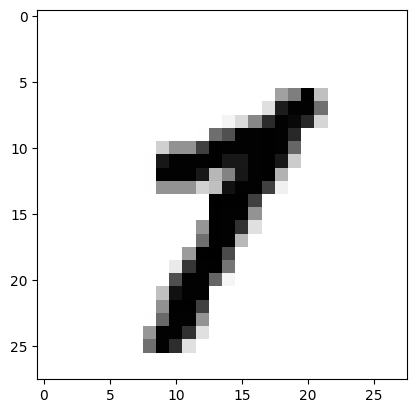

Error: Index 42747, Predicted: 8, Actual: 9


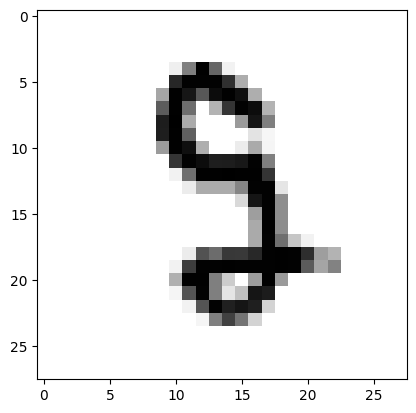

Error: Index 43018, Predicted: 7, Actual: 9


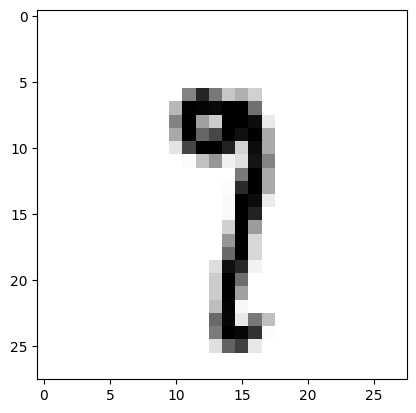

Error: Index 43249, Predicted: 9, Actual: 4


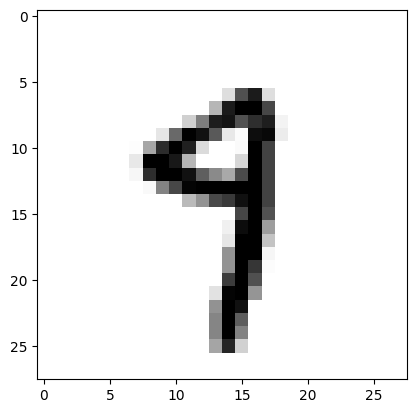

Error: Index 43354, Predicted: 5, Actual: 8


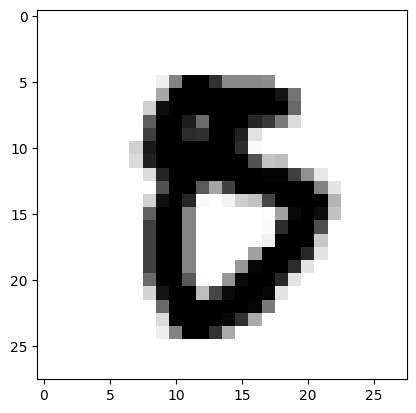

Error: Index 43655, Predicted: 1, Actual: 8


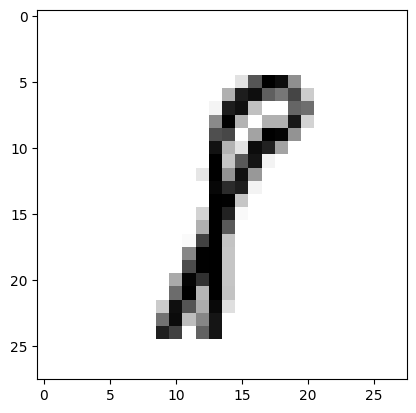

Error: Index 44355, Predicted: 3, Actual: 8


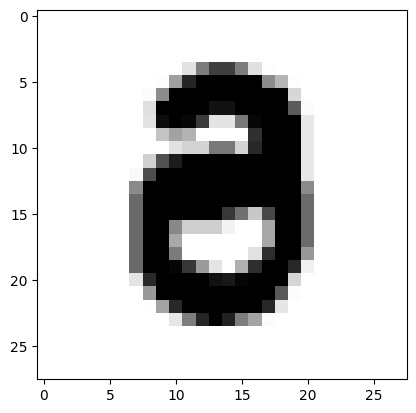

Error: Index 44713, Predicted: 7, Actual: 1


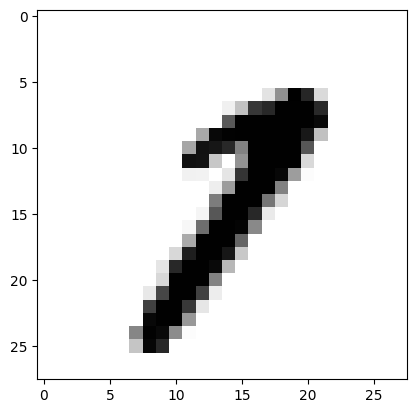

Error: Index 44765, Predicted: 8, Actual: 3


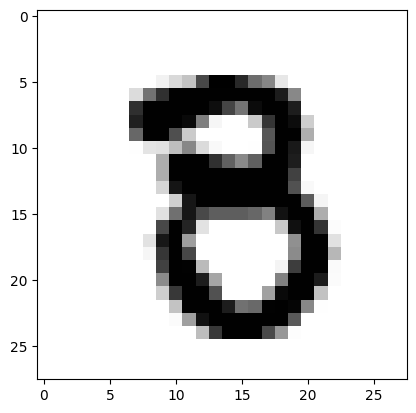

Error: Index 45356, Predicted: 1, Actual: 7


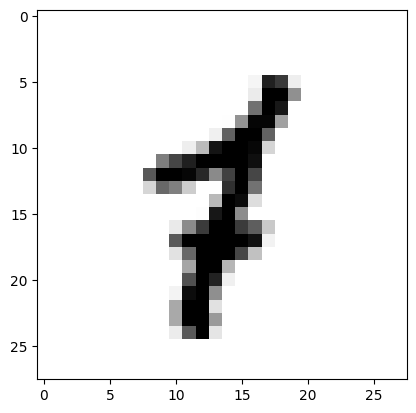

Error: Index 45509, Predicted: 2, Actual: 9


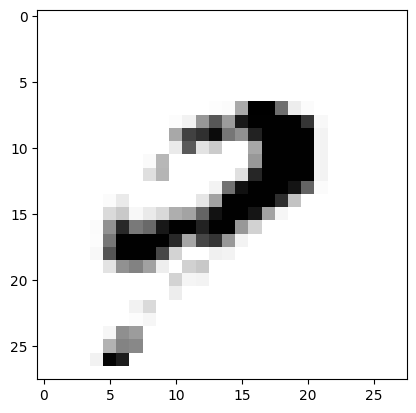

Error: Index 46571, Predicted: 9, Actual: 7


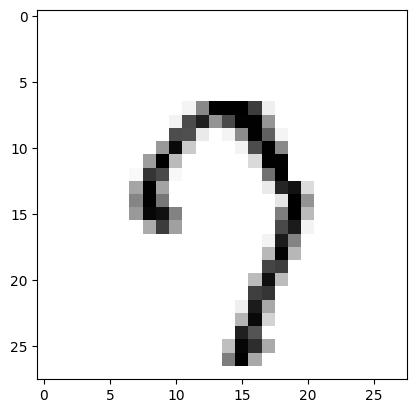

Error: Index 46957, Predicted: 8, Actual: 9


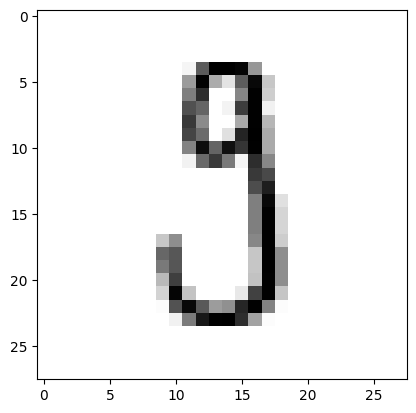

Error: Index 47684, Predicted: 6, Actual: 0


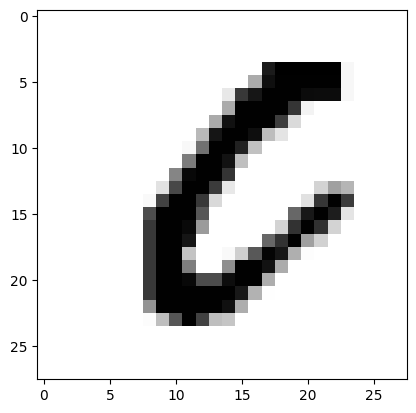

Indices of incorrect predictions: [75, 253, 637, 1021, 1266, 1682, 2025, 2321, 3046, 3850, 3922, 4150, 4390, 7073, 7293, 7417, 7664, 7928, 8415, 8485, 8788, 8824, 8856, 9499, 9620, 11433, 11759, 11798, 12130, 12148, 12414, 13037, 13422, 13979, 14877, 15104, 15364, 15578, 15865, 15920, 16109, 16851, 16865, 17061, 17254, 17444, 17721, 17999, 18694, 18954, 19612, 20367, 20557, 21258, 22047, 22723, 22945, 23253, 23733, 23986, 24116, 24365, 24481, 24638, 24752, 25114, 25333, 26804, 27323, 27445, 27484, 27691, 27891, 27996, 28562, 28780, 28797, 29284, 29320, 29373, 29577, 30452, 30544, 30911, 30960, 30969, 31035, 31163, 31303, 31320, 31448, 31680, 32242, 32246, 32350, 32603, 32934, 34883, 35866, 36039, 36519, 36724, 38263, 38653, 38926, 39375, 39635, 39715, 39920, 40461, 41052, 41226, 41638, 41689, 41756, 42586, 42747, 43018, 43249, 43354, 43655, 44355, 44713, 44765, 45356, 45509, 46571, 46957, 47684]
Accuracy:  99.73125 %


In [3]:
# Load the MNIST dataset
(x, y), _ = keras.datasets.mnist.load_data()

# Split the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the data matrix and labels
print("Extracting features from the training dataset...")
data = []
labels = []

# Extract HOG features for each image in the dataset
for img, label in zip(train_images, train_labels):
    img = (img / np.max(img)) * 255 # Normalizing the image
    img = img.astype("uint8")
    H = feature.hog(img, orientations=9, pixels_per_cell=(4, 4),
                    cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2")
    data.append(H)
    labels.append(label)

# Train a classifier on the data
model = svm.SVC()
model.fit(data, labels)

# Evaluate the classifier
predicted = model.predict(data)

# Initialize an empty list to store the indices of incorrect predictions
error_indices = []

# Print out the error predictions
for i, (pred, actual) in enumerate(zip(predicted, labels)):
    if pred != actual:
        print(f"Error: Index {i}, Predicted: {pred}, Actual: {actual}")
        plt.imshow(train_images[i], cmap=plt.cm.gray_r, interpolation='nearest')
        plt.show()
        # Add the index of the incorrect prediction to the list
        error_indices.append(i)

print("Indices of incorrect predictions:", error_indices)

accuracy = metrics.accuracy_score(labels, predicted)
print("Accuracy: ", accuracy * 100, "%")


After doing some experiment , i see that HOG method on the keras MNIST dataset took the model 17 minutes to predict but when using the dataset from sklearn , because this dataset images is already reduce to 8x8 images so it only took me 22 seconds

In [ ]:
# Print out the predictions
for i, (pred, actual) in enumerate(zip(predicted, labels)):
    if pred == actual:
        print(f"Correct: Index {i}, Predicted: {pred}, Actual: {actual}")
        plt.imshow(train_images[i], cmap=plt.cm.gray_r, interpolation='nearest')
        plt.show()
    else:
        print(f"Error: Index {i}, Predicted: {pred}, Actual: {actual}")
        plt.imshow(train_images[i], cmap=plt.cm.gray_r, interpolation='nearest')
        plt.show()

accuracy = metrics.accuracy_score(labels, predicted)
print("Accuracy: ", accuracy * 100, "%")

# Compare CNN with HOG:

- **Accuracy:** Both methods have high accuracy, with the CNN method achieving an accuracy of 98.91% and the HOG method achieving an accuracy of 99.731%. Although the HOG method is slightly more accurate, the difference is not significant. the reason that why the HOG method have a higher accuracy is because HOG's focus on edge information might be particularly well-suited for the relatively simple shapes of MNIST digits.

- **Execution Time:** The CNN method is significantly faster than the HOG method. It took 207 seconds to fully execute the CNN method, while it took 1053 seconds to fully execute the HOG method. This makes the CNN method more efficient. CNN's ability to learn features directly from the data often leads to more efficient computations compared to HOG's manual feature extraction process.

- **Complexity:** The CNN method is more complex than the HOG method. CNNs automatically learn and improve from experience without being explicitly programmed to do so, while the HOG method relies on predefined feature descriptors.

- **Versatility:** CNNs are more versatile than HOG. They can be used for a wide range of image recognition tasks, while HOG is more specialized for object detection tasks.